## Cargar el Dataset

In [1]:
import pandas as pd

df = pd.read_csv('master_dataset.csv', delimiter=";", low_memory=False)
df.head()

,fecha_encuesta,region,pais,latitud,longitud,exactitud,sexo,edad,altura,peso,...,VIH_positva,hipertension,otro_cronico,asilo_ancianos,trabajador_salud,prescripcion_medica,opinion_infeccion,opinion_mortalidad,riesgo_infeccion,riesgo_mortalidad
0,43914,NaN,1,436023.0,-793058.0,100.0,male,20_30,178,88,...,0,0,0,0,0,0,NaN,NaN,5.0,0.05
1,43915,NaN,1,510263.0,-1140862.0,5.0,female,30_40,158,54,...,0,0,0,0,0,0,NaN,NaN,5.0,0.05
2,43915,NaN,1,431642.0,-798471.0,100.0,male,90_100,184,94,...,0,1,0,0,0,0,NaN,NaN,12.0,14701.00
3,43915,NaN,1,456605.0,-736724.0,5.0,male,60_70,172,96,...,0,1,0,0,0,0,NaN,NaN,6.0,2.25
4,43915,NaN,1,492525.0,-1229481.0,1.0,male,30_40,166,70,...,0,0,0,0,0,0,NaN,NaN,5.0,0.05


## Limpieza de Ruido

In [2]:
import numpy as np
df = df.fillna(0)
df = df.replace('other',0)
df = df.replace('unknown',0)
df = df.replace('undefined',0)

## Transformacion de Variables Categorias a Numericas

In [3]:
df
df['region'] = df['region'].replace({"AF":0,"AS":1,"EU":2,"NA":3,"OC":4,'SA':5})
df['tipo_sangre'] = df['tipo_sangre'].replace({"abn":0,"abp":1,"an":2,"ap":3,"bn":4,"bp":5,'on':6,'op':7})
df['ingresos'] = df['ingresos'].replace({"blank":0,"gov":1,"high":2,"low":3,"med":4})
df['carrera'] = df['carrera'].replace({"asian":0,"black":1,"blank":2,"hispanic":3,"mixed":4,"other":5,"white":6})
df['inmigrante'] = df['inmigrante'].replace({"blank":0,"immigrant":1,"native":2})
df['fuma'] = df['fuma'].replace({"never":0,"quit0":1,"quit10":2, "quit5":3,"vape":4,"yesheavy":5,"yeslight":6,"yesmedium":7})
df['trabajando'] = df['trabajando'].replace({"home":0,"never":1,"stopped":2,"travel critical":3,"travel non critical":4})
df['tasa_reduccion_riesgo_tipo_mascarilla'] = df['tasa_reduccion_riesgo_tipo_mascarilla'].replace({"clothhome":0,"clothstore":1,"level1":2,"level2":3,"level3":4,"na":5,"surgical":6})
df['pais'] =df['pais'].astype('str')
df['sexo'] =df['sexo'].astype('str')
df['seguro'] =df['seguro'].astype('str')
df['prescripcion_medica'] =df['prescripcion_medica'].astype('str')

#Escoger columnas que van hacer procesadas
Xsubset = df[['region','latitud','longitud','exactitud','edad','altura','peso','masa_corporal','tipo_sangre',
              'ingresos','carrera','inmigrante','fuma','alcohol','canabis','anfetaminas','cocaina','lsd','extasis',
              'cuenta_contactos','cuenta_casa','cuenta_transporte_publico','trabajando','preocupado','tasa_reduccion_riesgo_individual',
              'tasa_reduccion_riesgo_unico_distanciamiento_social','tasa_reduccion_riesgo_lavarse_manos',
              'tasa_reduccion_riesgo_casa','tasa_reduccion_riesgo_distanciamiento_social_casa',
              'tasa_reduccion_riesgo_lavado_manos_casa','tasa_reduccion_riesgo_desinfectante',
              'tasa_reduccion_mascarilla','tasa_reduccion_riesgo_tipo_mascarilla','tasa_accion_gobierno','tasa_control_gobierno',
              'tasa_gasto_gobierno','opinion_infeccion','opinion_mortalidad','riesgo_infeccion',
              'riesgo_mortalidad','pais','sexo','seguro','prescripcion_medica']]

Var_Ordinales=df[['covid19_sintomas','covid19_contacto','asma','nefropatia',
              'enfermedad_higado','inmune_coprometida','cardiopatia','enfermedad_pulmonar','diabetes','VIH_positva','hipertension',
              'otro_cronico','asilo_ancianos','trabajador_salud','covid19_positivo']]

## Procesamiento del dataset

In [4]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
preprocesador1 = make_column_transformer(
    (StandardScaler(),['region','latitud','longitud','exactitud','edad','altura','peso','masa_corporal','tipo_sangre',
              'ingresos','carrera','inmigrante','fuma','alcohol','canabis','anfetaminas','cocaina','lsd','extasis',
              'cuenta_contactos','cuenta_casa','cuenta_transporte_publico','trabajando','preocupado','tasa_reduccion_riesgo_individual',
              'tasa_reduccion_riesgo_unico_distanciamiento_social','tasa_reduccion_riesgo_lavarse_manos',
              'tasa_reduccion_riesgo_casa','tasa_reduccion_riesgo_distanciamiento_social_casa',
              'tasa_reduccion_riesgo_lavado_manos_casa','tasa_reduccion_riesgo_desinfectante',
              'tasa_reduccion_mascarilla','tasa_reduccion_riesgo_tipo_mascarilla','tasa_accion_gobierno','tasa_control_gobierno',
              'tasa_gasto_gobierno','opinion_infeccion','opinion_mortalidad','riesgo_infeccion',
              'riesgo_mortalidad']),
    (OneHotEncoder(),['pais','sexo','seguro','prescripcion_medica'])   
    )
#Guardar en la variable X los valores transformados
X = preprocesador1.fit_transform(Xsubset)
#Asisnacion de variables categoricas nominales
categorical_features = ['pais','sexo','seguro','prescripcion_medica']
#Asisnacion de variables categoricas numericas
cnamesDataset1 = ['region','latitud','longitud','exactitud','edad','altura','peso','masa_corporal','tipo_sangre',
              'ingresos','carrera','inmigrante','fuma','alcohol','canabis','anfetaminas','cocaina','lsd','extasis',
              'cuenta_contactos','cuenta_casa','cuenta_transporte_publico','trabajando','preocupado','tasa_reduccion_riesgo_individual',
              'tasa_reduccion_riesgo_unico_distanciamiento_social','tasa_reduccion_riesgo_lavarse_manos',
              'tasa_reduccion_riesgo_casa','tasa_reduccion_riesgo_distanciamiento_social_casa',
              'tasa_reduccion_riesgo_lavado_manos_casa','tasa_reduccion_riesgo_desinfectante',
              'tasa_reduccion_mascarilla','tasa_reduccion_riesgo_tipo_mascarilla','tasa_accion_gobierno','tasa_control_gobierno',
              'tasa_gasto_gobierno','opinion_infeccion','opinion_mortalidad','riesgo_infeccion',
              'riesgo_mortalidad']
cnamesDataset2 = preprocesador1.transformers_[1][1].get_feature_names(categorical_features)
#Agregar las variables categoricas nominales al Dataset
cnamesDataset1.extend(cnamesDataset2)
#Crear el dataset nuevo con las variables procesadas
preprocesadoStandar = pd.DataFrame(data=X,columns=cnamesDataset1)
datasetPreprocesado=pd.concat([preprocesadoStandar,Var_Ordinales],axis=1)
datasetPreprocesado.to_csv("DatasetPreprocesado.csv", sep=";",index = False) #sep es el separado, por defector es ","
datasetPreprocesado.head()

,region,latitud,longitud,exactitud,edad,altura,peso,masa_corporal,tipo_sangre,ingresos,...,inmune_coprometida,cardiopatia,enfermedad_pulmonar,diabetes,VIH_positva,hipertension,otro_cronico,asilo_ancianos,trabajador_salud,covid19_positivo
0,-0.35355,0.639016,-0.176777,0.034639,-0.516338,0.769795,0.110668,-0.243972,0.298525,-0.407245,...,0,0,0,0,0,0,0,0,0,0
1,-0.35355,1.033243,-0.954167,-0.458959,-0.173346,-1.037312,-1.301829,-1.017189,-1.137530,-0.407245,...,0,0,0,0,0,0,0,0,0,0
2,-0.35355,0.615752,-0.188876,0.034639,29.391858,1.311928,0.359932,-0.243972,-0.419502,-0.407245,...,1,0,1,1,0,1,0,0,0,0
3,-0.35355,0.748310,-0.050863,-0.458959,0.855629,0.227663,0.443020,0.351785,-1.137530,-0.407245,...,0,0,0,1,0,1,0,0,0,0
4,-0.35355,0.939051,-1.152243,-0.479742,-0.173346,-0.314469,-0.637125,-0.535513,-0.778516,-0.407245,...,0,0,0,0,0,0,0,0,0,0


## Ver la cantidad de grupos con los pacientes puestos en el dataset

In [5]:
gedf=df.groupby(['edad'])
print('--------- Numero de Grupos con la cantidad de Ususarios en cada Grupo del Dataset Principal ---------')
print('Cantidad de Grupos -->',len(gedf.groups))
print(gedf.size())
gedp=datasetPreprocesado.groupby(['edad'])
print('--------- Numero de Grupos con la cantidad de Ususarios en cada Grupo del Dataset Preprocesado ---------')
print('Cantidad de Grupos -->',len(gedp.groups))
print(gedp.size())

--------- Numero de Grupos con la cantidad de Ususarios en cada Grupo del Dataset Principal ---------
Cantidad de Grupos --> 12
edad
0               4
0_10         5414
100_110        52
10_20       24302
20_30      190938
30_40      257822
40_50      172614
50_60       94706
60_70       53726
70_80       17102
80_90        3230
90_100        670
dtype: int64
--------- Numero de Grupos con la cantidad de Ususarios en cada Grupo del Dataset Preprocesado ---------
Cantidad de Grupos --> 12
edad
-1.205717          4
-1.202321       5414
-0.859329      24302
-0.516338     190938
-0.173346     257822
 0.169646     172614
 0.512637      94706
 0.855629      53726
 1.198621      17102
 1.541612       3230
 29.391858       670
 32.791211        52
dtype: int64


## Agrupación de los pacientes con respecto a la edad
### Niñez (0-10 años)
### Adolescencia (10 - 20 años)
### Juventud (20 - 30 años)
### Adultez (30-60 años)
### Persona Mayor (> 60 años)

In [6]:
datasetNinez = datasetPreprocesado[(datasetPreprocesado['edad'] == -1.2057169865380815) | (datasetPreprocesado['edad'] == -1.2023210292675681)]
print('Dataset Niñez con ',len(datasetNinez), 'pacientes')

datasetAdolecencia =datasetPreprocesado[(datasetPreprocesado['edad'] == -0.8593293449457281)]
print('Dataset Adolecencia con ',len(datasetAdolecencia), 'pacientes')

datasetJuventud =datasetPreprocesado[(datasetPreprocesado['edad'] == -0.516337660623888)]
print('Dataset Juventud con ',len(datasetJuventud), 'pacientes')

datasetAdultez =datasetPreprocesado[(datasetPreprocesado['edad'] == -0.1733459763020478) | (datasetPreprocesado['edad']  == 0.16964570801979234) | (datasetPreprocesado['edad']  == 0.5126373923416325)]
print('Dataset Adultez con ',len(datasetAdultez), 'pacientes')

datasetPMayor =datasetPreprocesado[(datasetPreprocesado['edad'] == 0.8556290766634727) | (datasetPreprocesado['edad']  == 1.1986207609853128) | (datasetPreprocesado['edad']  == 1.5416124453071531) | (datasetPreprocesado['edad'] == 29.391858020786472) | (datasetPreprocesado['edad']  == 32.79121124857025)]
print('Dataset Persona Mayor con ',len(datasetPMayor), 'pacientes')


Dataset Niñez con  5418 pacientes
Dataset Adolecencia con  24302 pacientes
Dataset Juventud con  190938 pacientes
Dataset Adultez con  525142 pacientes
Dataset Persona Mayor con  74780 pacientes


## Medidas Descriptivas en el Dataset Niñez

In [7]:
datasetNinez.describe()


,region,latitud,longitud,exactitud,edad,altura,peso,masa_corporal,tipo_sangre,ingresos,...,inmune_coprometida,cardiopatia,enfermedad_pulmonar,diabetes,VIH_positva,hipertension,otro_cronico,asilo_ancianos,trabajador_salud,covid19_positivo
count,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,...,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000,5418.000000
mean,-0.148768,0.072628,-0.088172,0.008749,-1.202324,-3.484079,-1.336196,0.183410,-0.273591,-0.201665,...,0.083426,0.015873,0.016242,0.017350,0.000923,0.022148,0.073828,0.000185,0.001477,0.000923
std,0.769098,0.862727,0.889842,0.952846,0.000092,2.158495,0.860546,0.904928,0.990812,0.744394,...,0.276550,0.124996,0.126417,0.130582,0.030367,0.147180,0.261515,0.013586,0.038401,0.030367
min,-0.353550,-3.992280,-1.937722,-0.479742,-1.205717,-15.313465,-3.545207,-3.755138,-1.137530,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.353550,0.055757,-0.536473,-0.458959,-1.202321,-5.374372,-1.717269,-0.459459,-1.137530,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.353550,0.332436,-0.295630,-0.432980,-1.202321,-4.290107,-1.717269,0.250380,-0.778516,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.353550,0.539783,-0.115119,0.034639,-1.202321,-2.121577,-1.571865,0.846137,0.657539,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.651910,1.767847,5.535249,4.710833,-1.202321,6.191119,3.932719,14.257017,1.375566,2.927578,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Correlacion con Risk Infection

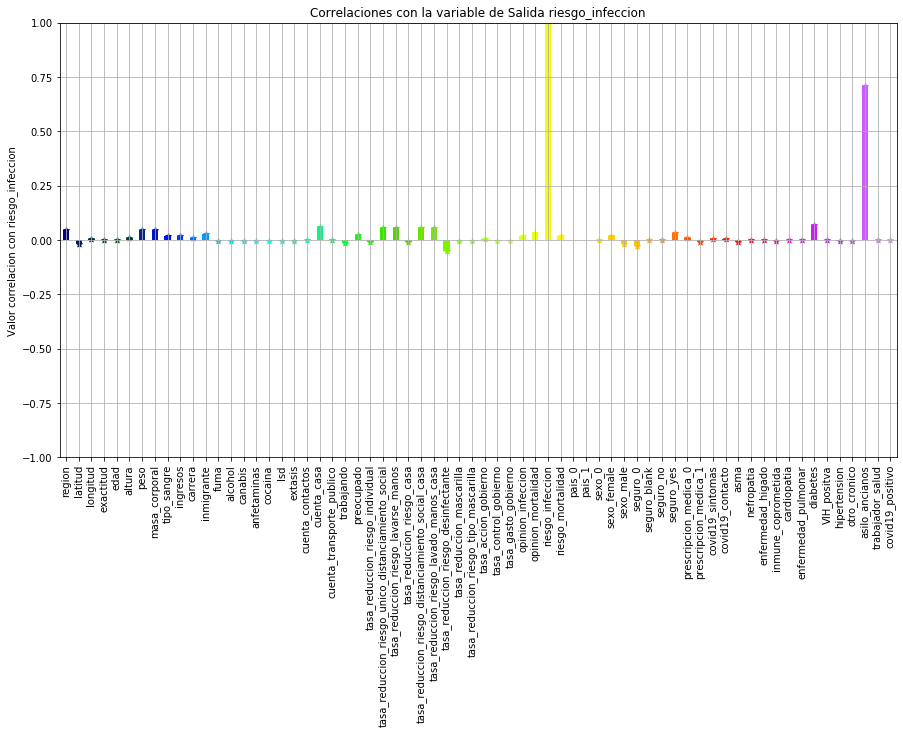

In [8]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np

corrNI=datasetNinez.corrwith(datasetNinez['riesgo_infeccion']).round(10)
XNI = datasetNinez.columns
YNI = corrNI
colormap = plt.cm.gist_ncar
labelsNI = range(1,len(XNI)+1)
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetNinez.columns))] 
ax = YNI.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XNI,YNI,labelsNI):
           ax.scatter(x,y,label=lab,marker='*')
        
 #nipy_spectral, Set1,Paired  
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YNI,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida riesgo_infeccion")
plt.ylabel("Valor correlacion con riesgo_infeccion")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones Niñez con Risk_Infection.jpg", bbox_inches='tight')



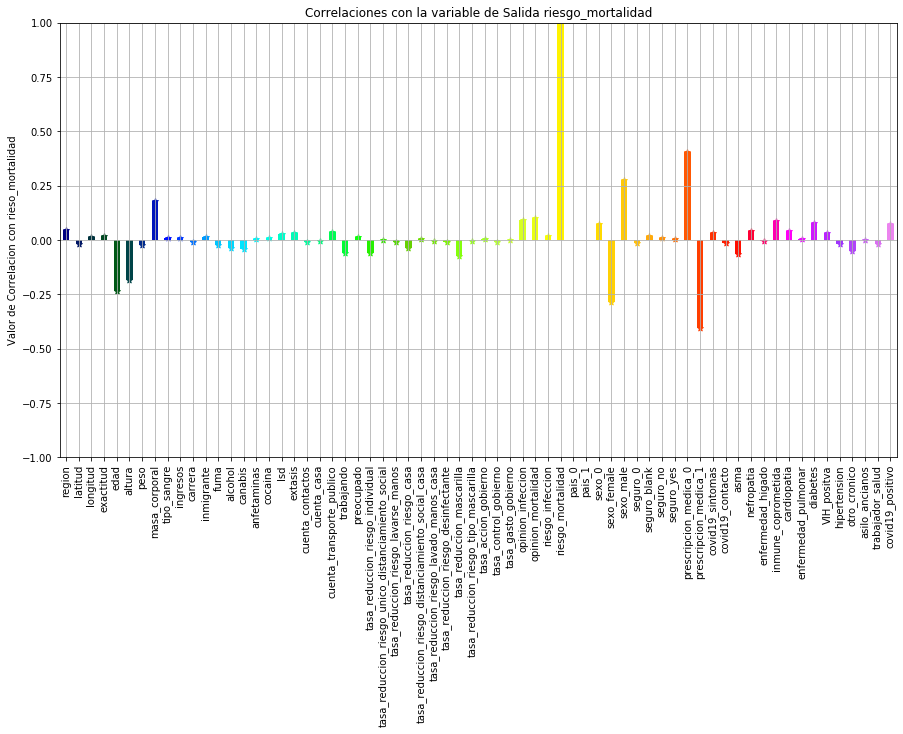

In [9]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrNM=datasetNinez.corrwith(datasetNinez['riesgo_mortalidad']).round(10)
XNM = datasetNinez.columns
YNM = corrNM
labelsNM = range(1,len(XNM)+1)
plt.figure(figsize=(15,8))
colormap = plt.cm.gist_ncar
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetNinez.columns))] 
ax = YNM.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XNM,YNM,labelsNM):
           ax.scatter(x,y,label=lab,marker='*')
        
#----
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YNM,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida riesgo_mortalidad")
plt.ylabel("Valor de Correlacion con rieso_mortalidad")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones Niñez con risk_mortality.jpg", bbox_inches='tight')

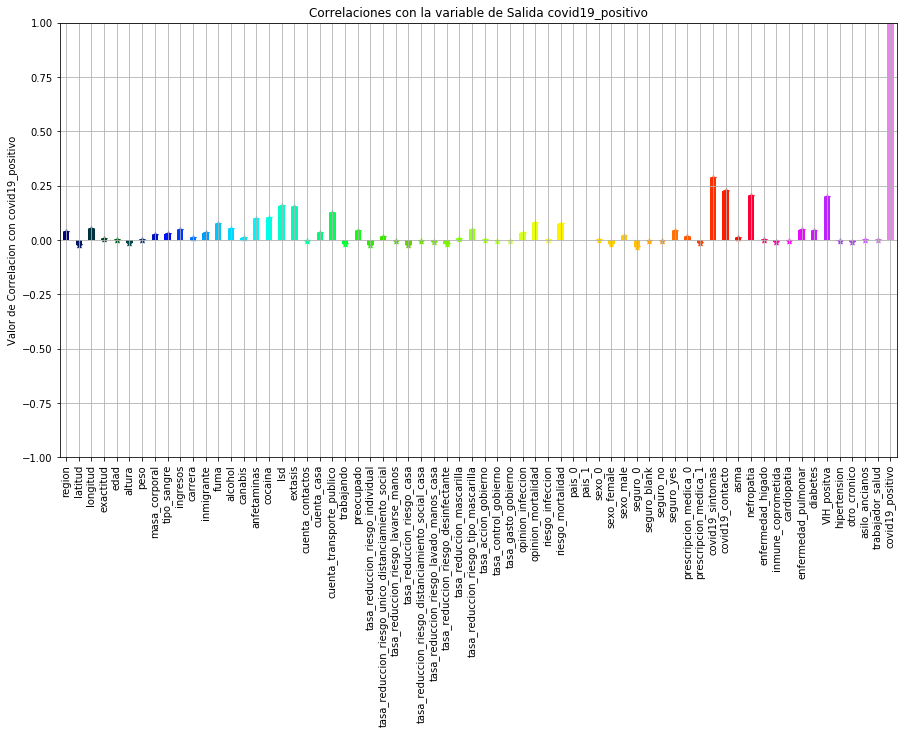

In [10]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrNC=datasetNinez.corrwith(datasetNinez['covid19_positivo']).round(10)
XNC = datasetNinez.columns
YNC = corrNC
colormap = plt.cm.gist_ncar
labelsNC = range(1,len(XNC)+1)
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetNinez.columns))] 
ax = YNC.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XNC,YNC,labelsNC):
           ax.scatter(x,y,label=lab,marker='*')
        
#--
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YNC,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida covid19_positivo")
plt.ylabel("Valor de Correlacion con covid19_positivo")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Niñez con covid19_positive.jpg", bbox_inches='tight')

## Medidas Descriptivas en el Dataset Adolecencia

In [11]:
datasetAdolecencia.describe()

,region,latitud,longitud,exactitud,edad,altura,peso,masa_corporal,tipo_sangre,ingresos,...,inmune_coprometida,cardiopatia,enfermedad_pulmonar,diabetes,VIH_positva,hipertension,otro_cronico,asilo_ancianos,trabajador_salud,covid19_positivo
count,24302.000000,24302.000000,24302.000000,24302.000000,2.430200e+04,24302.000000,24302.000000,24302.000000,24302.000000,24302.000000,...,24302.000000,24302.000000,24302.000000,24302.000000,24302.000000,24302.000000,24302.000000,24302.000000,24302.000000,24302.000000
mean,0.087476,0.045418,0.145261,0.053775,-8.593293e-01,-0.297857,-0.645812,-0.564951,-0.383397,-0.030976,...,0.052341,0.006090,0.005432,0.019834,0.000782,0.017365,0.058637,0.000370,0.002345,0.002222
std,1.029160,1.030247,1.108469,1.040584,5.185958e-13,1.138569,0.900282,0.911745,0.970124,0.972973,...,0.222719,0.077802,0.073501,0.139432,0.027951,0.130629,0.234949,0.019241,0.048374,0.047087
min,-0.353550,-4.116984,-1.970000,-0.479742,-8.593293e-01,-5.374372,-1.717269,-2.322785,-1.137530,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.353550,0.049725,-0.489865,-0.458959,-8.593293e-01,-0.856602,-1.301829,-1.181973,-1.137530,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.353550,0.379919,-0.256537,-0.381023,-8.593293e-01,-0.314469,-0.886389,-0.814378,-1.137530,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.353550,0.568931,0.536327,0.034639,-8.593293e-01,0.408374,-0.221684,-0.180594,0.298525,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.651910,1.893391,5.550993,4.710833,-8.593293e-01,6.191119,3.932719,13.800692,1.375566,2.927578,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


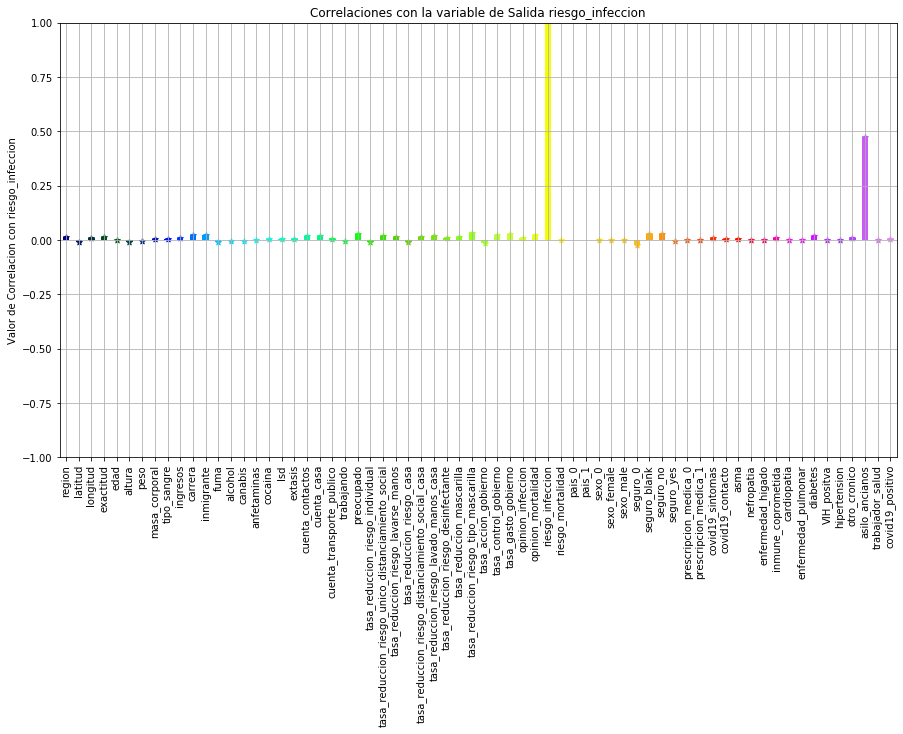

In [12]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrAI=datasetAdolecencia.corrwith(datasetAdolecencia['riesgo_infeccion']).round(10)
XAI = datasetAdolecencia.columns
YAI = corrAI
labelsAI = range(1,len(XAI)+1)
colormap = plt.cm.gist_ncar 
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetAdolecencia.columns))] 
ax = YAI.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XAI,YAI,labelsAI):
           ax.scatter(x,y,label=lab,marker='*')
        
# 
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YAI,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida riesgo_infeccion")
plt.ylabel("Valor de Correlacion con riesgo_infeccion")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Adolecencia con Risk_Infection.jpg", bbox_inches='tight')

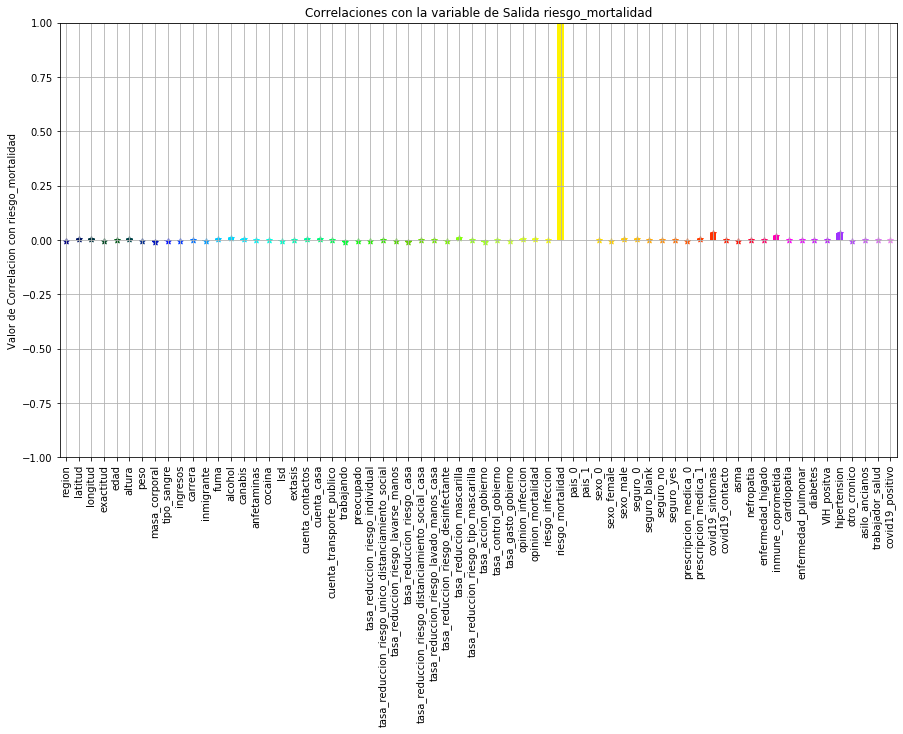

In [13]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrAM=datasetAdolecencia.corrwith(datasetAdolecencia['riesgo_mortalidad']).round(10)
XAM = datasetAdolecencia.columns
YAM = corrAM
labelsAM = range(1,len(XAM)+1)
colormap = plt.cm.gist_ncar
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetAdolecencia.columns))] 
ax = YAM.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XAM,YAM,labelsAM):
           ax.scatter(x,y,label=lab,marker='*')
        
#
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YAM,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida riesgo_mortalidad")
plt.ylabel("Valor de Correlacion con riesgo_mortalidad")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Adolecencia con risk_mortality.jpg", bbox_inches='tight')

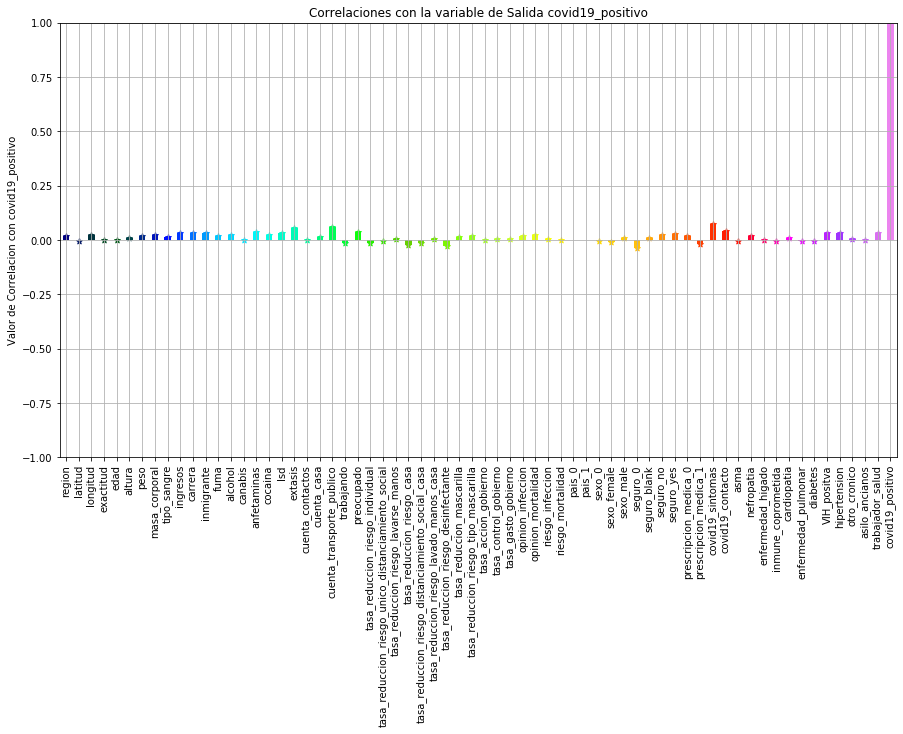

In [14]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrAC=datasetAdolecencia.corrwith(datasetAdolecencia['covid19_positivo']).round(10)
XAC = datasetAdolecencia.columns
YAC = corrAC
colormap = plt.cm.gist_ncar
labelsAC = range(1,len(XAC)+1)
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetAdolecencia.columns))] 
ax = YAC.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XAC,YAC,labelsAC):
           ax.scatter(x,y,label=lab,marker='*')
        
#
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YAC,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida covid19_positivo")
plt.ylabel("Valor de Correlacion con covid19_positivo")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Adolecencia con covid19_positive.jpg", bbox_inches='tight')

## Medidas Descriptivas en el Dataset Juventud

In [15]:
datasetJuventud.describe()

,region,latitud,longitud,exactitud,edad,altura,peso,masa_corporal,tipo_sangre,ingresos,...,inmune_coprometida,cardiopatia,enfermedad_pulmonar,diabetes,VIH_positva,hipertension,otro_cronico,asilo_ancianos,trabajador_salud,covid19_positivo
count,190938.000000,190938.000000,190938.000000,190938.000000,1.909380e+05,190938.000000,190938.000000,190938.000000,190938.000000,190938.000000,...,190938.00000,190938.000000,190938.000000,190938.000000,190938.000000,190938.000000,190938.000000,190938.000000,190938.000000,190938.000000
mean,0.002258,-0.010402,0.029859,0.051323,-5.163377e-01,-0.038638,-0.138683,-0.125379,-0.145014,-0.122256,...,0.05022,0.003897,0.003258,0.022651,0.002325,0.042401,0.059119,0.000246,0.008862,0.001891
std,1.008146,1.006355,1.023724,1.015840,1.420756e-12,0.953789,0.992555,1.015798,1.005685,0.872963,...,0.21840,0.062301,0.056983,0.148790,0.048166,0.201503,0.235847,0.015687,0.093718,0.043441
min,-0.353550,-4.531034,-2.320575,-0.484938,-5.163377e-01,-5.374372,-1.717269,-2.487569,-1.137530,-0.407245,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.353550,0.005742,-0.499252,-0.458959,-5.163377e-01,-0.675891,-0.886389,-0.865081,-1.137530,-0.407245,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.353550,0.331267,-0.275994,-0.432980,-5.163377e-01,-0.133759,-0.304772,-0.370729,-0.060489,-0.407245,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.353550,0.543040,-0.048309,0.034639,-5.163377e-01,0.589085,0.359932,0.402488,1.016552,-0.407245,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.651910,2.109005,5.551268,4.710833,-5.163377e-01,6.191119,3.932719,14.890801,1.375566,2.927578,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


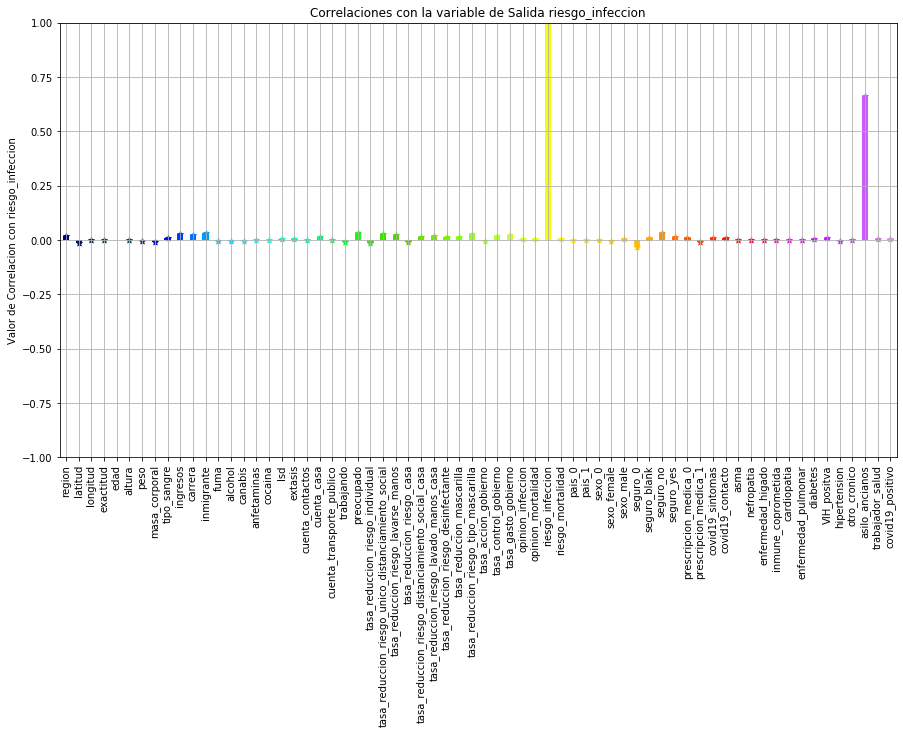

In [16]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrJI=datasetJuventud.corrwith(datasetJuventud['riesgo_infeccion']).round(10)
XJI = datasetJuventud.columns
YJI = corrJI
colormap = plt.cm.gist_ncar
labelsJI = range(1,len(XJI)+1)
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetJuventud.columns))] 
ax = YJI.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XJI,YJI,labelsJI):
           ax.scatter(x,y,label=lab,marker='*')
        
 #nipy_spectral, Set1,Paired  
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YJI,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida riesgo_infeccion")
plt.ylabel("Valor de Correlacion con riesgo_infeccion")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Juventud con Risk_Infection.jpg", bbox_inches='tight')

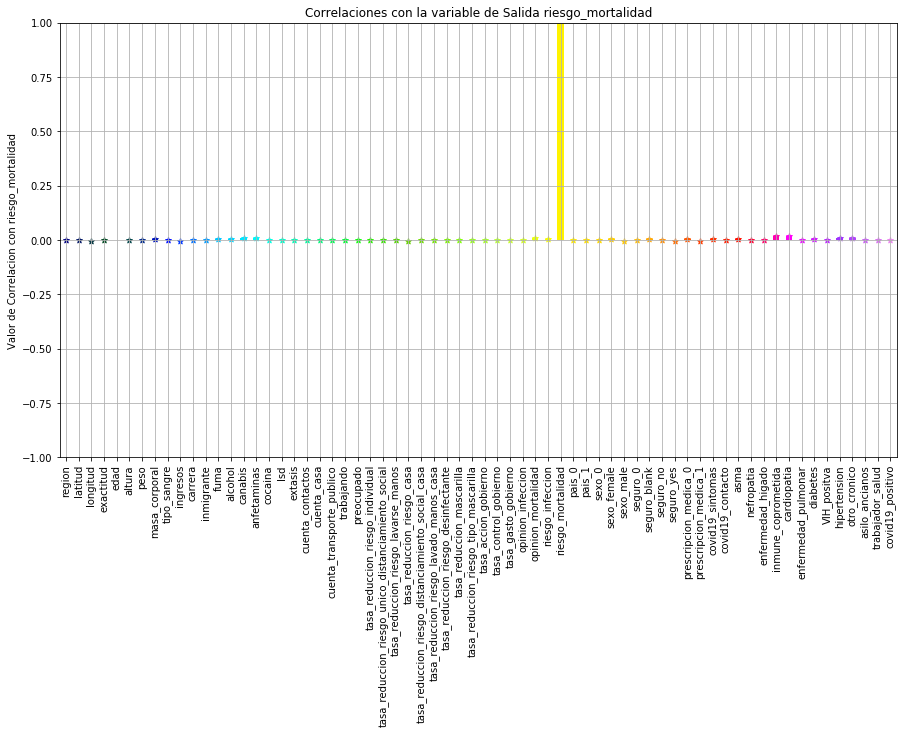

In [17]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrJM=datasetJuventud.corrwith(datasetJuventud['riesgo_mortalidad']).round(10)
XJM = datasetJuventud.columns
YJM = corrJM
labelsJM = range(1,len(XJM)+1)
plt.figure(figsize=(15,8))
colormap = plt.cm.gist_ncar
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetJuventud.columns))] 
ax = YJM.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XJM,YJM,labelsJM):
           ax.scatter(x,y,label=lab,marker='*')
        
#
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YJM,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida riesgo_mortalidad")
plt.ylabel("Valor de Correlacion con riesgo_mortalidad")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Juventud con risk_mortality.jpg", bbox_inches='tight')

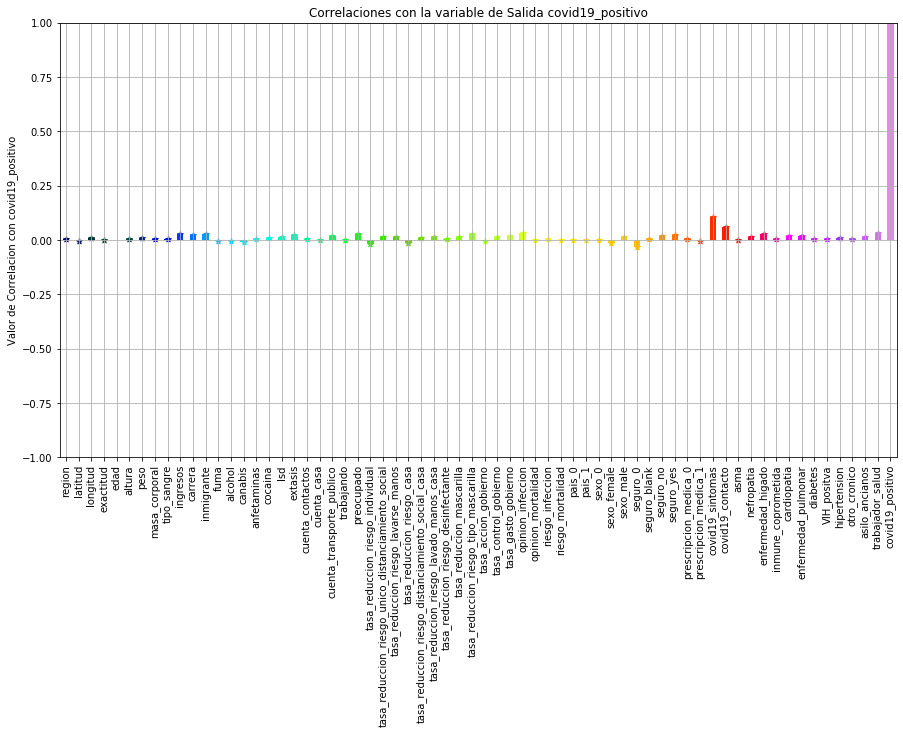

In [18]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrJC=datasetJuventud.corrwith(datasetJuventud['covid19_positivo']).round(10)
XJC = datasetJuventud.columns
YJC = corrJC
colormap = plt.cm.gist_ncar
labelsJC = range(1,len(XJC)+1)
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetJuventud.columns))] 
ax = YJC.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XJC,YJC,labelsJC):
           ax.scatter(x,y,label=lab,marker='*')
        
#
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YJC,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida covid19_positivo")
plt.ylabel("Valor de Correlacion con covid19_positivo")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Juventud con covid19_positive.jpg", bbox_inches='tight')

## Medidas Descriptivas en el Dataset Adultez

In [19]:
datasetAdultez.describe()

,region,latitud,longitud,exactitud,edad,altura,peso,masa_corporal,tipo_sangre,ingresos,...,inmune_coprometida,cardiopatia,enfermedad_pulmonar,diabetes,VIH_positva,hipertension,otro_cronico,asilo_ancianos,trabajador_salud,covid19_positivo
count,525142.000000,525142.000000,525142.000000,525142.000000,525142.000000,525142.000000,525142.000000,525142.000000,525142.000000,525142.000000,...,525142.000000,525142.000000,525142.000000,525142.000000,525142.000000,525142.000000,525142.000000,525142.000000,525142.000000,525142.000000
mean,-0.003673,-0.000753,-0.013185,-0.010799,0.063108,0.060931,0.105935,0.083237,0.056850,0.012861,...,0.059209,0.012100,0.010793,0.062037,0.003761,0.142853,0.075947,0.000166,0.013002,0.002133
std,0.999193,0.997797,0.986434,0.994728,0.260046,0.925617,0.999596,1.002761,0.990115,1.011443,...,0.236015,0.109331,0.103329,0.241222,0.061211,0.349923,0.264914,0.012870,0.113284,0.046133
min,-0.353550,-4.424788,-2.324223,-0.484938,-0.173346,-5.374372,-1.717269,-2.424191,-1.137530,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.353550,-0.053468,-0.537668,-0.458959,-0.173346,-0.495180,-0.637125,-0.636919,-1.137530,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.353550,0.330914,-0.280360,-0.432980,0.169646,0.046952,-0.055508,-0.117215,-0.060489,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.353550,0.546375,-0.044383,-0.225150,0.169646,0.769795,0.609197,0.592623,1.016552,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.651910,2.111480,5.585256,4.710833,0.512637,6.191119,3.932719,11.113446,1.375566,2.927578,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


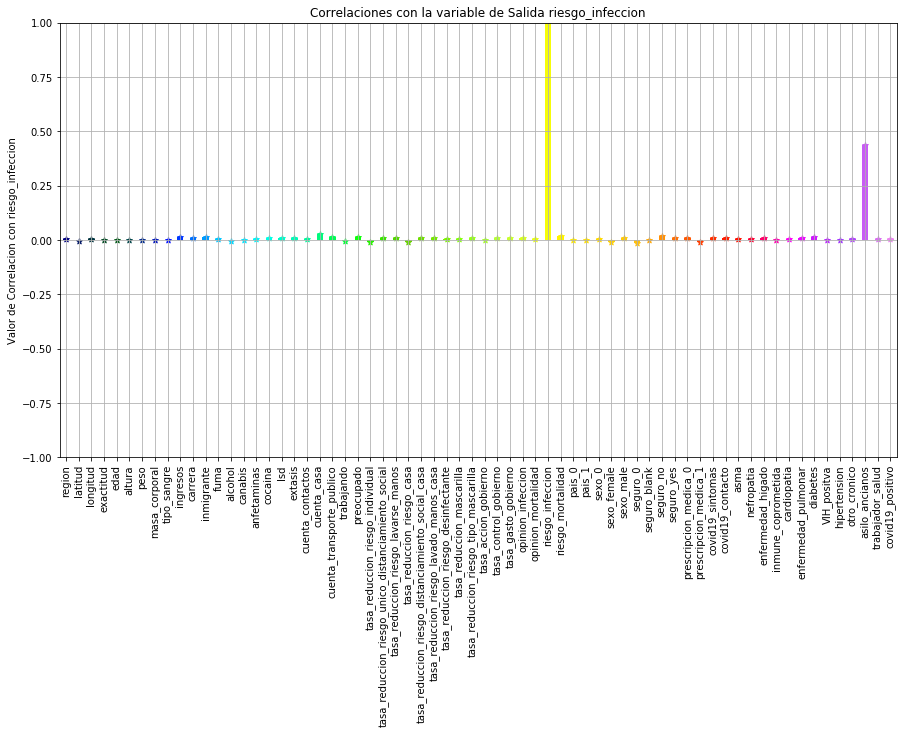

In [20]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrADI=datasetAdultez.corrwith(datasetAdultez['riesgo_infeccion']).round(10)
XADI = datasetAdultez.columns
YADI = corrADI
colormap = plt.cm.gist_ncar 
labelsADI = range(1,len(XADI)+1)
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetAdultez.columns))] 
ax = YADI.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XADI,YADI,labelsADI):
           ax.scatter(x,y,label=lab,marker='*')
        
#nipy_spectral, Set1,Paired  
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YADI,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida riesgo_infeccion")
plt.ylabel("Valor de Correlacion con riesgo_infeccion")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Adultez con Risk_Infection.jpg", bbox_inches='tight')

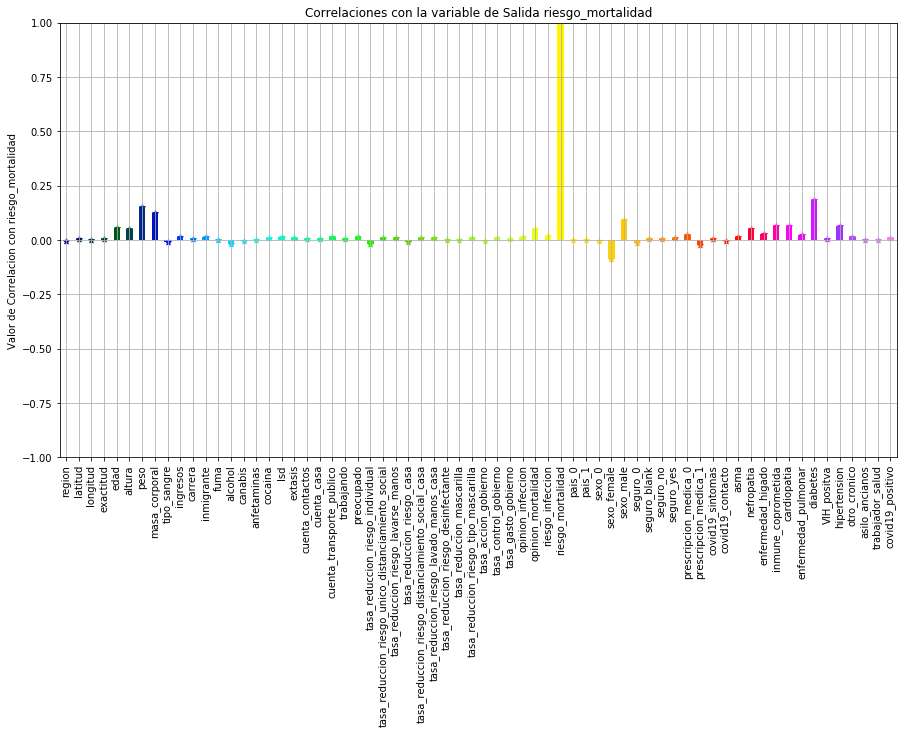

In [21]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrADM=datasetAdultez.corrwith(datasetAdultez['riesgo_mortalidad']).round(10)
XADM = datasetAdultez.columns
YADM = corrADM
colormap = plt.cm.gist_ncar
labelsADM = range(1,len(XADM)+1)
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetAdultez.columns))] 
ax = YADM.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XADM,YADM,labelsADM):
           ax.scatter(x,y,label=lab,marker='*')
        
#
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YADM,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida riesgo_mortalidad")
plt.ylabel("Valor de Correlacion con riesgo_mortalidad")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Adultez con risk_mortality.jpg", bbox_inches='tight')

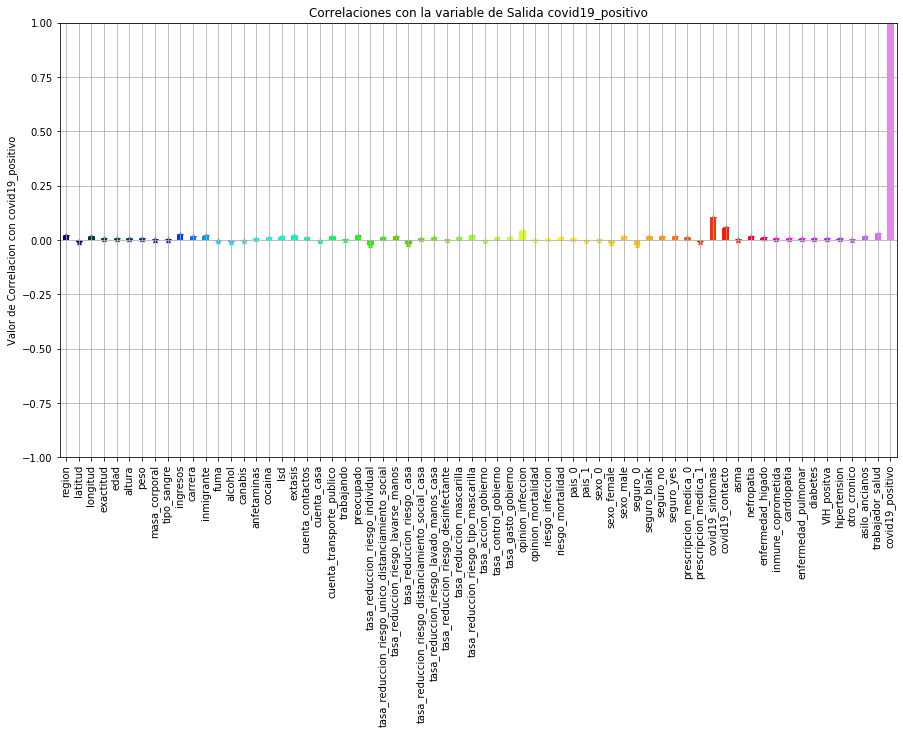

In [22]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrADC=datasetAdultez.corrwith(datasetAdultez['covid19_positivo']).round(10)
XADC = datasetAdultez.columns
YADC = corrADC
colormap = plt.cm.gist_ncar
labelsADC = range(1,len(XADC)+1)
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetAdultez.columns))] 
ax = YADC.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XADC,YADC,labelsADC):
           ax.scatter(x,y,label=lab,marker='*')
        
#
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YADC,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida covid19_positivo")
plt.ylabel("Valor de Correlacion con covid19_positivo")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Adultez con covid19_positive.jpg", bbox_inches='tight')

## Medidas Descriptivas en el Dataset Persona Mayor

In [23]:
datasetPMayor.describe()

,region,latitud,longitud,exactitud,edad,altura,peso,masa_corporal,tipo_sangre,ingresos,...,inmune_coprometida,cardiopatia,enfermedad_pulmonar,diabetes,VIH_positva,hipertension,otro_cronico,asilo_ancianos,trabajador_salud,covid19_positivo
count,74780.000000,74780.000000,74780.000000,74780.000000,74780.000000,74780.000000,74780.000000,74780.000000,74780.000000,74780.000000,...,74780.000000,74780.000000,74780.000000,74780.000000,74780.000000,74780.000000,74780.000000,74780.000000,74780.000000,74780.000000
mean,0.002378,0.011824,-0.024464,-0.073319,1.241581,0.019995,-0.083137,-0.094085,0.115461,0.246520,...,0.085772,0.090519,0.063145,0.163587,0.004105,0.357810,0.113306,0.001792,0.008532,0.004413
std,0.987822,0.997755,0.997976,0.978918,2.811323,0.967718,0.851033,0.862591,0.993297,1.179930,...,0.280028,0.286926,0.243226,0.369902,0.063942,0.479359,0.316968,0.042293,0.091973,0.066284
min,-0.353550,-4.534857,-2.038089,-0.484938,0.855629,-5.374372,-1.717269,-2.424191,-1.137530,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.353550,-0.058380,-0.565714,-0.458959,0.855629,-0.675891,-0.637125,-0.674946,-1.137530,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.353550,0.331302,-0.267842,-0.432980,0.855629,0.046952,-0.221684,-0.243972,-0.060489,-0.407245,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.353550,0.553488,-0.021919,-0.225150,1.198621,0.769795,0.359932,0.301082,1.375566,1.260167,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.651910,1.898765,5.549636,4.710833,32.791211,6.191119,3.932719,12.368339,1.375566,2.927578,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


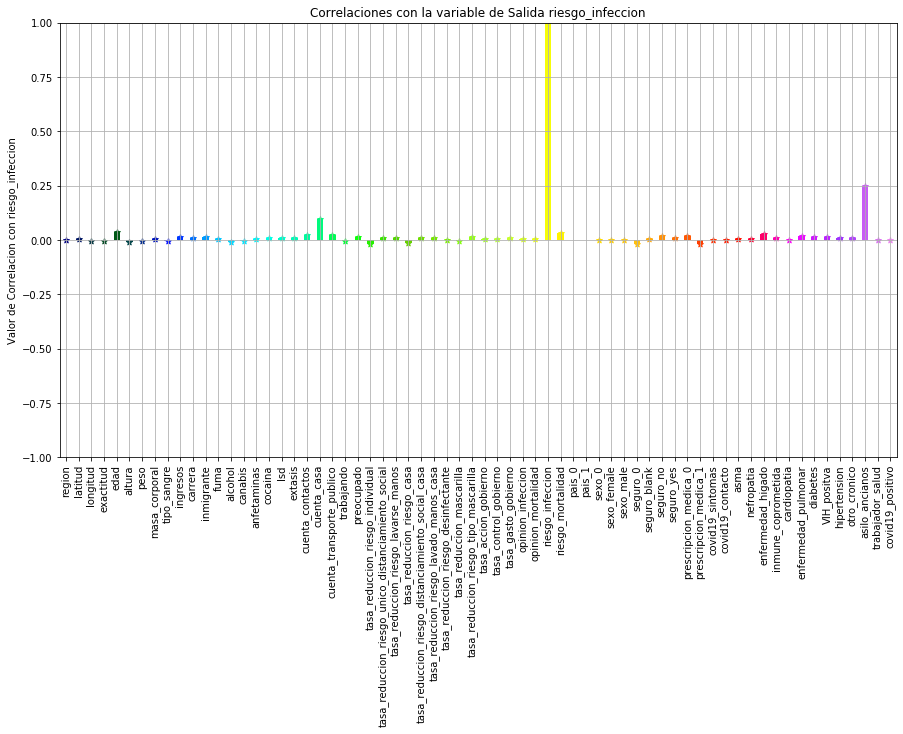

In [24]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrPMI=datasetPMayor.corrwith(datasetPMayor['riesgo_infeccion']).round(10)
XPMI = datasetPMayor.columns
YPMI = corrPMI
colormap = plt.cm.gist_ncar
labelsPMI = range(1,len(XPMI)+1)
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetPMayor.columns))] 
ax = YPMI.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XPMI,YPMI,labelsPMI):
           ax.scatter(x,y,label=lab,marker='*')
        
 #nipy_spectral, Set1,Paired  
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YPMI,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida riesgo_infeccion")
plt.ylabel("Valor de Correlacion con riesgo_infeccion")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Personas Mayores con Risk_Infection.jpg", bbox_inches='tight')

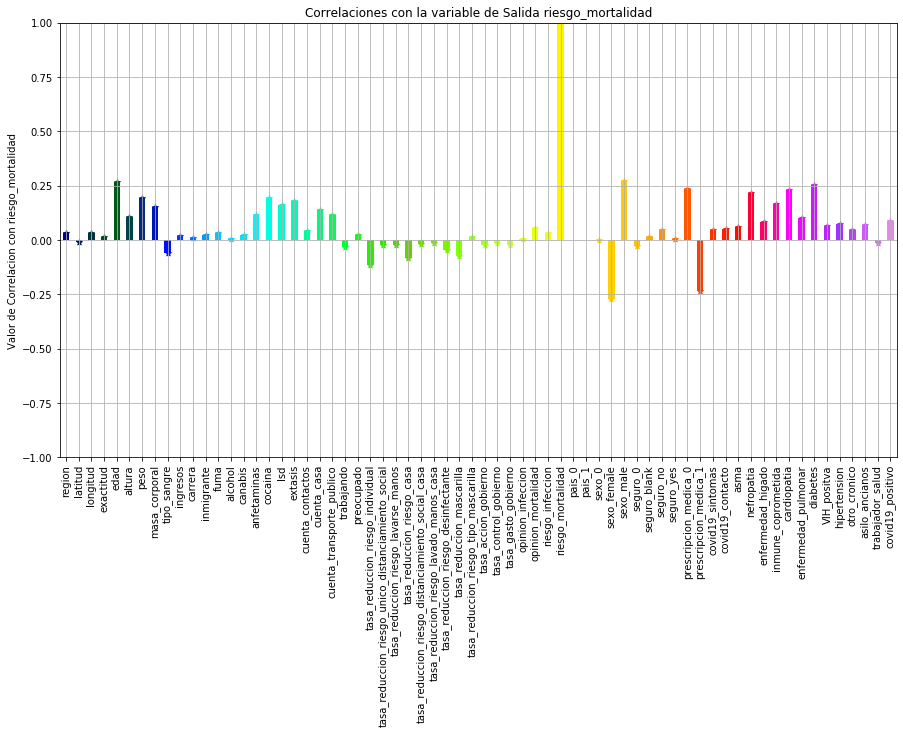

In [25]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrPMM=datasetPMayor.corrwith(datasetPMayor['riesgo_mortalidad']).round(10)
XPMM = datasetPMayor.columns
YPMM = corrPMM
colormap = plt.cm.gist_ncar
labelsPMM = range(1,len(XPMM)+1)
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetPMayor.columns))] 
ax = YPMM.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XPMM,YPMM,labelsPMM):
           ax.scatter(x,y,label=lab,marker='*')
        
#
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YPMM,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida riesgo_mortalidad")
plt.ylabel("Valor de Correlacion con riesgo_mortalidad")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Personas Mayores con risk_mortality.jpg", bbox_inches='tight')

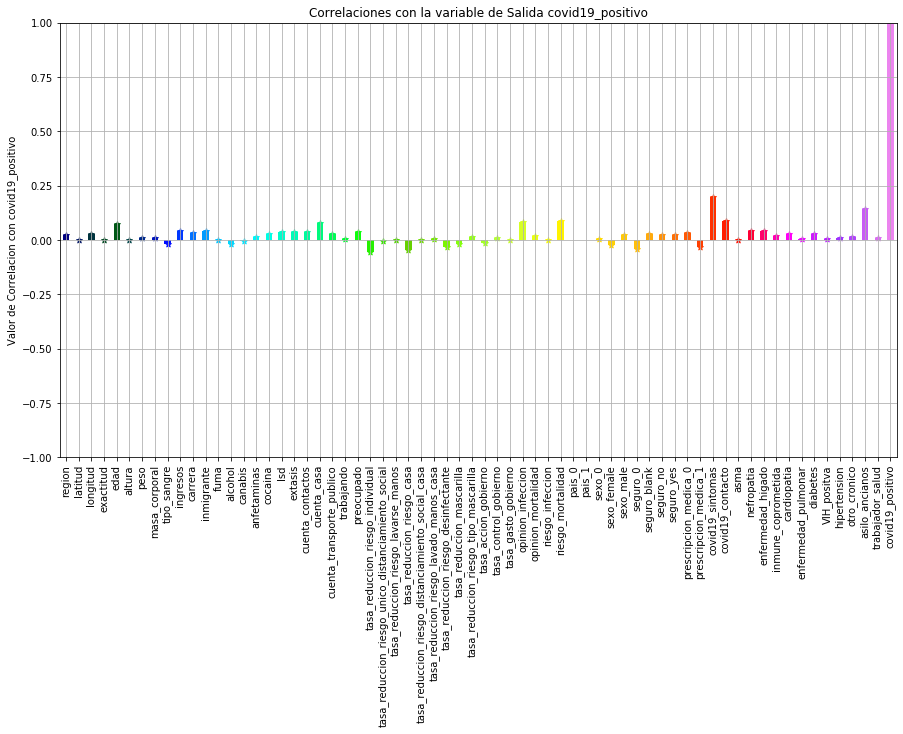

In [26]:
import matplotlib.pyplot as plt
from random import randint
import numpy as np
corrPMC=datasetPMayor.corrwith(datasetPMayor['covid19_positivo']).round(10)
XPMC = datasetPMayor.columns
YPMC = corrPMC
colormap = plt.cm.gist_ncar
labelsPMC = range(1,len(XPMC)+1)
plt.figure(figsize=(15,8))
colorst = [colormap(i) for i in np.linspace(0, 0.9,len(datasetPMayor.columns))] 
ax = YPMC.plot(kind='bar',color=colorst)
plt.xticks(rotation = 90) 

for x,y,lab in zip(XPMC,YPMC,labelsPMC):
           ax.scatter(x,y,label=lab,marker='*')
        
#
      
for t,j1 in enumerate(ax.collections):
       j1.set_color(colorst[t])

ax.tick_params(axis='x', labelrotation=90)
#ax.legend(YPMC,fontsize='small',bbox_to_anchor=(0, 1), loc='lower left', ncol=8)
plt.title("Correlaciones con la variable de Salida covid19_positivo")
plt.ylabel("Valor de Correlacion con covid19_positivo")
plt.ylim(-1,1)
ax.grid()
plt.savefig("Correlaciones en Personas Mayores con covid19_positive.jpg", bbox_inches='tight')

# Salida que escogimos para los Dataset es el covid19_positive

--------------------

# Medicion de los Accuracy de todos los dataset Agrupados para ver el Valor del Accuracy con respecto al dataset con reduccion de dimensionalidad, con los valores de la Varianza

# Accuracy del dataset Niñez

In [27]:
X = datasetNinez.drop('covid19_positivo',1)
y = datasetNinez['covid19_positivo']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [30]:
from sklearn.decomposition import PCA

pca = PCA()  
PCAX_train = pca.fit_transform(X_train)  
PCAX_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_  

In [31]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(PCAX_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(PCAX_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))  

[[1084]]
accuracy: 1.0


# Accuracy del Dataset Adolecencia

In [33]:
X = datasetAdolecencia.drop('covid19_positivo',1)
y = datasetAdolecencia['covid19_positivo']

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [36]:
from sklearn.decomposition import PCA

pca = PCA()  
PCAX_train = pca.fit_transform(X_train)  
PCAX_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_  

In [37]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(PCAX_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(PCAX_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[4848    0]
 [  13    0]]
accuracy: 0.9973256531577864


# Accuracy del dataset Juventud

In [39]:
X = datasetJuventud.drop('covid19_positivo',1)
y = datasetJuventud['covid19_positivo']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [42]:
from sklearn.decomposition import PCA

pca = PCA()  
PCAX_train = pca.fit_transform(X_train)  
PCAX_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_  

In [43]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(PCAX_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(PCAX_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[38110     0]
 [   78     0]]
accuracy: 0.9979574735519011


# Accuracy del Dataset  Adultez

In [45]:
X = datasetAdultez.drop('covid19_positivo',1)
y = datasetAdultez['covid19_positivo']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [48]:
from sklearn.decomposition import PCA

pca = PCA()  
PCAX_train = pca.fit_transform(X_train)  
PCAX_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_  

In [49]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(PCAX_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(PCAX_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[104785      0]
 [   244      0]]
accuracy: 0.9976768321130355


# Accuracy del dataset Persona Mayor

In [51]:
X = datasetAdultez.drop('covid19_positivo',1)
y = datasetAdultez['covid19_positivo']

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [54]:
from sklearn.decomposition import PCA

pca = PCA()  
PCAX_train = pca.fit_transform(X_train)  
PCAX_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_  

In [55]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(PCAX_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(PCAX_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[104785      0]
 [   244      0]]
accuracy: 0.9976768321130355


# Reduccion de Dimesionalidad de los dataset

### Porque interesa identificar y eliminar las variables irrelevantes.
### Porque no siempre el mejor modelo es el que más variables tiene en cuenta.
### Porque se mejora el rendimiento computacional, lo que se traduce en un ahorro en coste y tiempo.
### Porque se reduce la complejidad, lo que lleva a facilitar la comprensión del modelo y sus resultados.

### Dataset Niñez

In [57]:
from sklearn.decomposition import PCA
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
datasetNinez.drop('covid19_positivo',1)
XN=datasetNinez 
n_samples = XN.shape[0]
n_features = XN.shape[1]

print('********** Primera Forma')

num_components = min(n_samples, n_features)

pca = PCA(n_components=.85)
X_transformed = pca.fit_transform(XN)
eigenvalues = pca.explained_variance_
num_componentsSeleccionados = X_transformed.shape[1]

print(num_componentsSeleccionados)

print('Varianzas:')
print(eigenvalues.round(3))

explained_variance_ratio_=pca.explained_variance_ratio_
print('Porcentaje de varianza de cada dimension con respecto a la varianza total:')
print(explained_variance_ratio_.round(3))

print('Porcentaje acumulado de varianza:')
explained_variance_ratio_cumsum=explained_variance_ratio_.cumsum()
print(explained_variance_ratio_cumsum.round(3))

********** Primera Forma
19
Varianzas:
[6.032 4.736 2.015 1.943 1.3   1.28  1.151 1.032 0.945 0.885 0.841 0.757
 0.706 0.656 0.566 0.553 0.489 0.391 0.383]
Porcentaje de varianza de cada dimension con respecto a la varianza total:
[0.195 0.153 0.065 0.063 0.042 0.041 0.037 0.033 0.031 0.029 0.027 0.024
 0.023 0.021 0.018 0.018 0.016 0.013 0.012]
Porcentaje acumulado de varianza:
[0.195 0.348 0.413 0.476 0.518 0.559 0.596 0.63  0.66  0.689 0.716 0.74
 0.763 0.784 0.803 0.821 0.836 0.849 0.861]


El Numero de componentes seleccionados es:  19


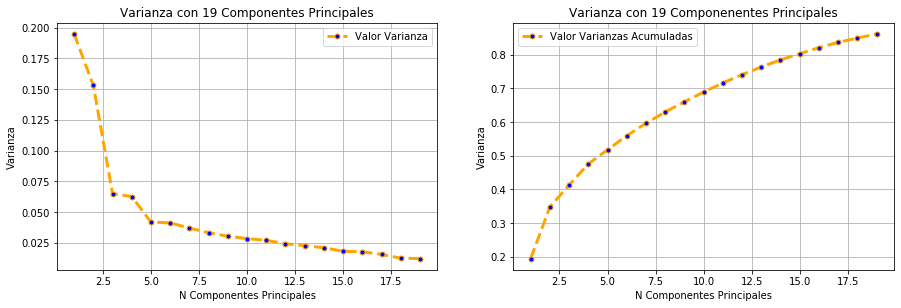

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03,5.418000e+03
mean,-5.391692e-16,3.931886e-16,-4.044999e-17,8.094352e-17,1.637261e-17,1.531936e-16,1.317698e-16,4.923054e-17,4.090080e-17,5.762689e-17,-2.528636e-17,8.749820e-18,9.999794e-18,1.518821e-16,1.677220e-16,-2.721255e-17,-1.418004e-17,-2.213069e-18,-5.510132e-17
std,2.455916e+00,2.176334e+00,1.419475e+00,1.393886e+00,1.140288e+00,1.131313e+00,1.072684e+00,1.016095e+00,9.722297e-01,9.405152e-01,9.172740e-01,8.701623e-01,8.400098e-01,8.098700e-01,7.521756e-01,7.437492e-01,6.989841e-01,6.256623e-01,6.184702e-01
min,-8.928254e+00,-6.186815e+00,-4.933363e+00,-9.893449e-01,-3.829215e+00,-5.003868e+00,-7.166419e+00,-4.675867e+00,-2.690931e+00,-4.818487e+00,-3.150009e+00,-3.963583e+00,-5.762500e+00,-3.570534e+00,-4.120554e+00,-3.723210e+00,-2.205516e+00,-8.807822e+00,-3.968489e+00
25%,-1.990529e+00,-1.073513e+00,-8.495632e-01,-1.164239e-01,-6.081477e-01,-5.016922e-01,-6.566552e-01,-7.192870e-01,-6.514242e-01,-4.260438e-01,-6.084887e-01,-5.718159e-01,-3.696005e-01,-4.800324e-01,-3.231750e-01,-3.032605e-01,-6.435025e-01,-1.126419e-01,-1.487309e-01
50%,-9.517542e-01,-8.481703e-02,1.454053e-02,-2.387878e-02,-2.522366e-01,-1.250981e-01,2.575526e-02,-8.926059e-02,9.043389e-03,8.928689e-02,-1.604062e-02,-2.403717e-02,8.437759e-02,-1.547717e-02,-7.086369e-02,1.410590e-03,-1.225239e-01,9.096022e-03,4.510829e-03
75%,1.634082e+00,5.154149e-01,8.897013e-01,6.399073e-02,2.848584e-01,2.707776e-01,6.458074e-01,6.172417e-01,5.631288e-01,5.441759e-01,5.327482e-01,5.371214e-01,4.180747e-01,3.849623e-01,1.920986e-01,3.592472e-01,6.894904e-01,1.110578e-01,1.587792e-01
max,1.056317e+01,1.151274e+01,6.212407e+00,7.205146e+01,7.353178e+00,2.981394e+01,9.811169e+00,6.372762e+00,6.552309e+00,5.078891e+00,3.655233e+00,4.076947e+00,9.534082e+00,7.610971e+00,4.874733e+00,4.242965e+00,2.577618e+00,2.032111e+01,6.724210e+00


In [58]:
print("El Numero de componentes seleccionados es: ", num_componentsSeleccionados)
num_pc= num_componentsSeleccionados

a = range(1,num_pc+1)
num_pc= a[::1]


plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)

plt.plot(num_pc, explained_variance_ratio_, color='orange', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'Valor Varianza')
plt.title('Varianza con '+str(num_componentsSeleccionados)+' Componentes Principales')
plt.xlabel('N Componentes Principales')
plt.ylabel('Varianza')
plt.legend(loc="upper right")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(num_pc, explained_variance_ratio_cumsum, color='orange', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'Valor Varianzas Acumuladas')
plt.title('Varianza con '+str(num_componentsSeleccionados)+' Componenentes Principales')
plt.xlabel('N Componentes Principales')
plt.ylabel('Varianza')
plt.legend(loc="upper left")
plt.grid()
plt.show()

principalDfN = pd.DataFrame(data = X_transformed
             , columns = num_pc)
principalDfN.describe()

# Accuracy del dataset Niñez con reduccion de Dimensionalidad

## Agregar Salida al Dataset Reducido Niñez

In [59]:
principalDfN['Salida']=datasetNinez['covid19_positivo'].values

## Splitting para dataset reducido

In [60]:
XSN = principalDfN.drop('Salida',1)
ySN = principalDfN['Salida']

## 20% para el test

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XSN, ySN, test_size=0.2, random_state=0) 

## Varianza del PCA para el Accuracy

In [62]:
from sklearn.decomposition import PCA

pca = PCA()  
PCAX_train = pca.fit_transform(X_train)  
PCAX_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_  

## Clasificacion con el algoritmo de aprendizaje Radom Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(PCAX_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(PCAX_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))  

[[1084]]
accuracy: 1.0


-------------

# Encontrar el Numero de componentes con Accuracy del Dataset reducido Niñez

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

PDAaccuracy= []
PDAncomponents=[]
for i in range(1,19):
    pca = PCA(n_components=i);
    PCAX_train = pca.fit_transform(X_train);
    PCAX_test = pca.transform(X_test);
    explained_variance = pca.explained_variance_ratio_;
    classifier = RandomForestClassifier(max_depth=2, random_state=0);
    classifier.fit(PCAX_train, y_train);
    y_pred = classifier.predict(PCAX_test);
    PDAncomponents.append(i);
    cm = confusion_matrix(y_test, y_pred);
    PDAaccuracy.append(accuracy_score(y_test, y_pred));

In [66]:
AccuracyMaximo = max(PDAaccuracy, key=float);
numComponente = PDAaccuracy.index(AccuracyMaximo);
print("Num. Componentes = ", numComponente+1, "AcuraccyMaximo = ", AccuracyMaximo)

Num. Componentes =  1 AcuraccyMaximo =  1.0


--------------

# Encontrar el Mejor K con el Metodo de Elbow

Text(0.5, 1.0, 'Eleccion del Mejor K con el Metodo de Elbow')

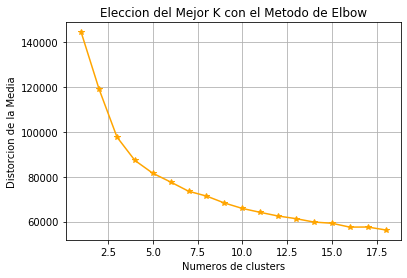

In [69]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from time import time
X=principalDfN
K_range=range(1,19,1)
distortions=[]
timeTotal=[]

for i in K_range:
    timeI=time()
    kmeanModel = KMeans(n_clusters=i,init='k-means++')
    kmeanModel.fit(principalDfN)
    distortions.append(kmeanModel.inertia_)
    timeF=time()
    timeC= timeF - timeI
    timeTotal.append(timeC)
        
fig1=plt.figure()
ex = fig1.add_subplot(111)
ex.plot(K_range, distortions, 'b*-', color='orange')

plt.grid(True)
plt.xlabel('Numeros de clusters')
plt.ylabel('Distorcion de la Media')
plt.title('Eleccion del Mejor K con el Metodo de Elbow')

# Tiempo de Ejecucion con cada numero de Klusters

Text(0.5, 1.0, 'Tiempo de Clusters')

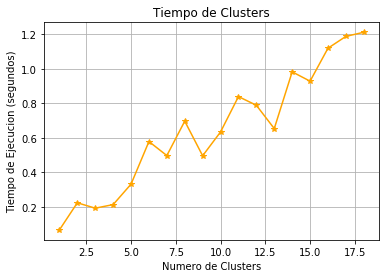

In [70]:
fig2=plt.figure()
plt.plot(K_range, timeTotal, 'b*-', color="orange")
plt.grid(True)
plt.xlabel('Numero de Clusters')
plt.ylabel('Tiempo de Ejecucion (segundos)')
plt.title('Tiempo de Clusters')

# Agrupacion en los Kluester escogidos

In [71]:
def doKmeans(x, nclust=4, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full'):
    model = KMeans(nclust)
    model.fit(x)
    clust_labels = model.predict(x)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(principalDfN, 40, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full')
kmeans = pd.DataFrame(clust_labels,columns=['Grupos'])

In [72]:
kmeans
UserGrupoK=kmeans.groupby(kmeans.Grupos).Grupos.count()

UserGrupoK=UserGrupoK.sort_values(ascending=False, inplace=False, kind='quicksort')

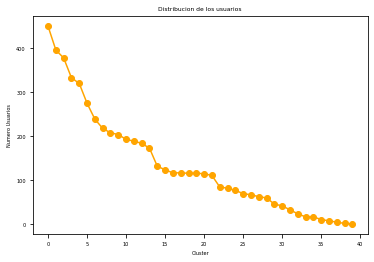

In [73]:
import matplotlib.pyplot as plt

grupo=UserGrupoK.index.tolist()
valores=UserGrupoK.values.tolist()

plt.rcParams.update({'font.size': 5})
plt.plot(range(len(grupo)), valores, color='orange', marker='o')
plt.title("Distribucion de los usuarios")
plt.xlabel("Cluster")
plt.ylabel("Numero Usuarios")
plt.show()

# Visualizacion

In [74]:
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

num_components=3
pca = PCA(num_components)
principalComponents = pca.fit_transform(X)

num_components=principalComponents.shape[1]
explained_variance_ratio_=pca.explained_variance_ratio_
explained_variance_ratio_
a = range(num_components)
num_pc= a[::1]

principalDfN = pd.DataFrame(data = principalComponents, columns = num_pc)
principalDfN=round(principalDfN, 2)

clust_labels, cent = doKmeans(principalDfN, 4)
kmeans = pd.DataFrame(clust_labels)
finalDf = pd.concat([principalDfN, kmeans], axis = 1)
finalDf.columns = ['ComponentePrincipal1', 'ComponentePrincipal2', 'ComponentePrincipal3', 'target']

<IPython.core.display.Javascript object>


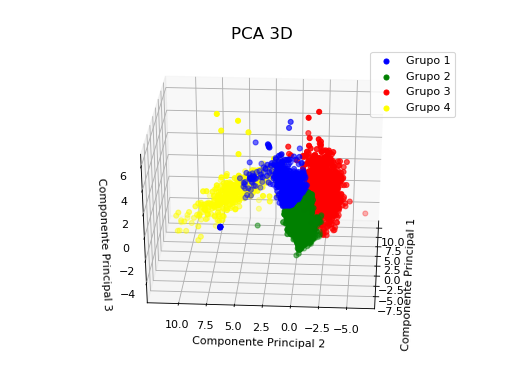

In [75]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

def init():
    ax1.set_xlabel('Componente Principal 1', fontsize=10)
    ax1.set_ylabel('Componente Principal 2', fontsize=10)
    ax1.set_zlabel('Componente Principal 3', fontsize=10)
    ax1.set_title('PCA 3D',fontsize=15)
    targets=[0,1,2,3]
    targetsNom=['Grupo 1', 'Grupo 2','Grupo 3', 'Grupo 4']
    colors=['blue','green','red', 'yellow']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax1.scatter(finalDf.loc[indicesToKeep, 'ComponentePrincipal1']
                   , finalDf.loc[indicesToKeep, 'ComponentePrincipal2']
                   , finalDf.loc[indicesToKeep, 'ComponentePrincipal3']
                   , c=color
                   )
    ax1.legend(targetsNom)
    ax1.grid()
    return fig,

def animate(i):
    ax1.view_init(elev=30., azim=3.6*i)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)  

<IPython.core.display.Javascript object>


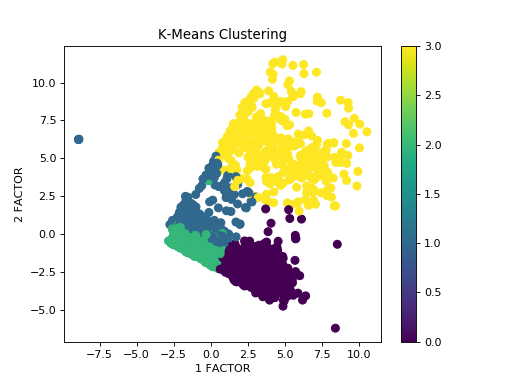

In [76]:
clust_labels, cent = doKmeans(principalDfN, 4)
kmeans = pd.DataFrame(clust_labels)
kmeans
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDfN[0],principalDfN[1],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1 FACTOR')
ax.set_ylabel('2 FACTOR')
plt.colorbar(scatter)

-----------------

# Dataset Adolecencia

In [77]:
from sklearn.decomposition import PCA
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
datasetAdolecencia.drop('covid19_positivo',1)
XA=datasetAdolecencia  
n_samples = XA.shape[0]
n_features = XA.shape[1]

#Primera forma: para obtener el porcentaje de varianza obtenido con cada componente
print('********** Primera Forma')

num_components = min(n_samples, n_features)
#num_components=num_componentsSeleccionados

#Se mantiene el 85% de la varianza de los datos
pca = PCA(n_components=.85)
X_transformed = pca.fit_transform(XA)#Esta es la matriz de componentes principales
eigenvalues = pca.explained_variance_
num_componentsSeleccionados = X_transformed.shape[1]

print(num_componentsSeleccionados)

print('Varianzas:')
print(eigenvalues.round(3))

explained_variance_ratio_=pca.explained_variance_ratio_
print('Porcentaje de varianza de cada dimension con respecto a la varianza total:')
print(explained_variance_ratio_.round(3))

#Se obtiene el porcentaje acumulado de varianza
print('Porcentaje acumulado de varianza:')
explained_variance_ratio_cumsum=explained_variance_ratio_.cumsum()
print(explained_variance_ratio_cumsum.round(3))

********** Primera Forma
22
Varianzas:
[9.004 2.881 2.146 1.949 1.804 1.712 1.508 1.27  1.21  1.146 1.097 1.05
 0.959 0.957 0.93  0.888 0.828 0.766 0.738 0.646 0.604 0.574]
Porcentaje de varianza de cada dimension con respecto a la varianza total:
[0.223 0.071 0.053 0.048 0.045 0.042 0.037 0.031 0.03  0.028 0.027 0.026
 0.024 0.024 0.023 0.022 0.02  0.019 0.018 0.016 0.015 0.014]
Porcentaje acumulado de varianza:
[0.223 0.294 0.347 0.395 0.44  0.482 0.52  0.551 0.581 0.609 0.636 0.662
 0.686 0.71  0.733 0.755 0.775 0.794 0.812 0.828 0.843 0.858]


El Numero de componentes seleccionados es:  22


<IPython.core.display.Javascript object>


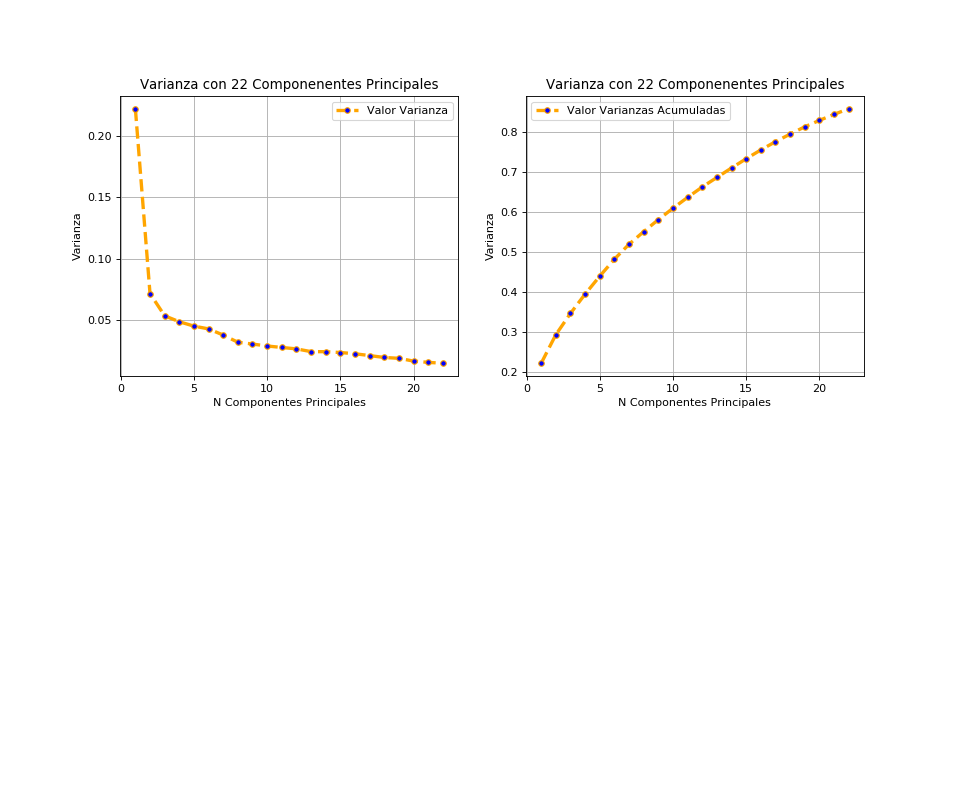

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
count,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,...,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04,2.430200e+04
mean,-6.511676e-16,-1.042633e-17,1.987821e-16,-1.038864e-17,2.266079e-16,2.306333e-16,2.369549e-16,-4.358065e-16,1.340735e-16,1.757115e-16,...,7.214371e-17,3.668003e-17,-4.065549e-16,-3.166159e-17,1.584450e-16,-6.838046e-17,1.891884e-16,3.347527e-17,-2.637819e-17,-2.650154e-17
std,3.000657e+00,1.697454e+00,1.464992e+00,1.396104e+00,1.343087e+00,1.308566e+00,1.228143e+00,1.126990e+00,1.099890e+00,1.070587e+00,...,9.794471e-01,9.780899e-01,9.644482e-01,9.425940e-01,9.100563e-01,8.751392e-01,8.590375e-01,8.034921e-01,7.771545e-01,7.573627e-01
min,-5.929261e+00,-5.207235e+00,-3.854801e+00,-1.939865e+01,-5.964576e+00,-6.421038e+00,-4.909000e+00,-4.145470e+00,-4.382261e+00,-5.475580e+00,...,-2.284179e+00,-1.242216e+01,-4.085263e+00,-5.079945e+00,-6.981487e+00,-3.997509e+00,-7.413259e+00,-3.750089e+00,-6.773202e+00,-1.805474e+01
25%,-1.471560e+00,-8.950141e-01,-8.905507e-01,-6.981444e-01,-6.727007e-01,-7.784689e-01,-7.964169e-01,-6.698579e-01,-7.390172e-01,-7.095715e-01,...,-2.494474e-01,-5.972673e-01,-5.949123e-01,-6.163410e-01,-4.457668e-01,-5.604288e-01,-3.270647e-01,-5.197219e-01,-1.631993e-01,-1.721077e-01
50%,-1.182189e+00,-2.824441e-01,-2.825747e-01,7.086912e-02,2.218351e-03,-2.037807e-03,-2.929240e-02,-5.695851e-02,-8.029194e-02,-4.270778e-03,...,1.933449e-02,-8.838612e-02,-2.860022e-02,-4.156591e-04,6.756149e-03,1.720552e-02,2.472737e-02,2.910003e-02,2.172309e-02,1.302331e-02
75%,-6.735369e-01,6.071195e-01,5.033144e-01,7.927189e-01,6.125767e-01,7.358368e-01,7.604878e-01,6.190301e-01,6.585615e-01,6.987320e-01,...,2.494335e-01,5.033015e-01,6.025061e-01,5.792517e-01,4.156532e-01,5.676723e-01,3.500678e-01,5.084361e-01,2.132589e-01,1.881722e-01
max,1.584026e+01,5.802992e+01,1.912932e+01,2.890052e+01,2.641399e+01,1.416497e+01,7.809451e+00,1.304796e+01,8.374708e+00,8.442261e+00,...,6.659045e+01,1.470607e+01,1.940443e+01,5.895855e+00,6.994331e+00,4.102929e+00,8.446296e+00,4.237201e+00,9.140123e+00,2.774735e+01


In [78]:
print("El Numero de componentes seleccionados es: ", num_componentsSeleccionados)
num_pc= num_componentsSeleccionados

a = range(1,num_pc+1)
num_pc= a[::1]


plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)

plt.plot(num_pc, explained_variance_ratio_, color='orange', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'Valor Varianza')
plt.title('Varianza con '+str(num_componentsSeleccionados)+' Componenentes Principales')
plt.xlabel('N Componentes Principales')
plt.ylabel('Varianza')
plt.legend(loc="upper right")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(num_pc, explained_variance_ratio_cumsum, color='orange', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'Valor Varianzas Acumuladas')
plt.title('Varianza con '+str(num_componentsSeleccionados)+' Componenentes Principales')
plt.xlabel('N Componentes Principales')
plt.ylabel('Varianza')
plt.legend(loc="upper left")
plt.grid()
plt.show()

principalDfA = pd.DataFrame(data = X_transformed
             , columns = num_pc)
principalDfA.describe()

# Accuracy del dataset Niñez con reduccion de Dimensionalidad

# Agregar Salida al Dataset Reducido Adolecencia

In [79]:
principalDfA['Salida']=datasetAdolecencia['covid19_positivo'].values

# Splitting para dataset reducido

In [80]:
XSA = principalDfA.drop('Salida',1)
ySA = principalDfA['Salida']

# 20% para el test

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XSA, ySA, test_size=0.2, random_state=0) 

In [82]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

# Varianza del PCA para el Accuracy

In [83]:
from sklearn.decomposition import PCA

pca = PCA()  
PCAX_train = pca.fit_transform(X_train)  
PCAX_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_  

# Clasificacion con el algoritmo de aprendizaje Radom Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(PCAX_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(PCAX_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))  

[[4848    0]
 [  13    0]]
accuracy: 0.9973256531577864


-------------------

# Encontrar el Numero de componentes con Accuracy del Dataset reducido Adolecencia

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

PDAaccuracy= []
PDAncomponents=[]
for i in range(1,22):
    pca = PCA(n_components=i);
    PCAX_train = pca.fit_transform(X_train);
    PCAX_test = pca.transform(X_test);
    explained_variance = pca.explained_variance_ratio_;
    classifier = RandomForestClassifier(max_depth=2, random_state=0);
    classifier.fit(PCAX_train, y_train);
    y_pred = classifier.predict(PCAX_test);
    PDAncomponents.append(i);
    cm = confusion_matrix(y_test, y_pred);
    PDAaccuracy.append(accuracy_score(y_test, y_pred));

In [87]:
AccuracyMaximo = max(PDAaccuracy, key=float);
numComponente = PDAaccuracy.index(AccuracyMaximo);
print("Num. Componentes = ", numComponente+1, "AcuraccyMaximo = ", AccuracyMaximo)

Num. Componentes =  1 AcuraccyMaximo =  0.9973256531577864


--------------

# Encontrar el Mejor K con el Metodo de Elbow

<IPython.core.display.Javascript object>


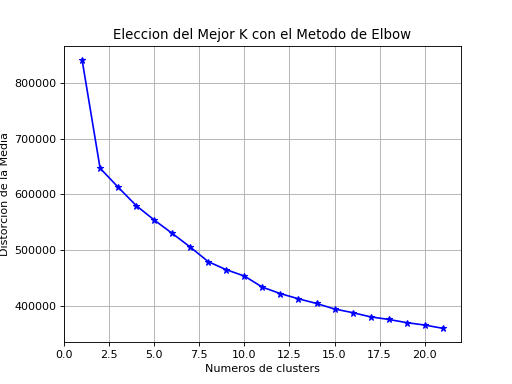

Text(0.5, 1.0, 'Eleccion del Mejor K con el Metodo de Elbow')

In [88]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from time import time
X=principalDfA
K_range=range(1,22,1)
distortions=[]
timeTotal=[]

for i in K_range:
    timeI=time()
    kmeanModel = KMeans(n_clusters=i,init='k-means++')
    kmeanModel.fit(principalDfA)
    distortions.append(kmeanModel.inertia_)
    timeF=time()
    timeC= timeF - timeI
    timeTotal.append(timeC)
        
fig1=plt.figure()
ex = fig1.add_subplot(111)
ex.plot(K_range, distortions, 'b*-')

plt.grid(True)
plt.xlabel('Numeros de clusters')
plt.ylabel('Distorcion de la Media')
plt.title('Eleccion del Mejor K con el Metodo de Elbow')

# Tiempo de Ejecucion con cada numero de Klusters

<IPython.core.display.Javascript object>


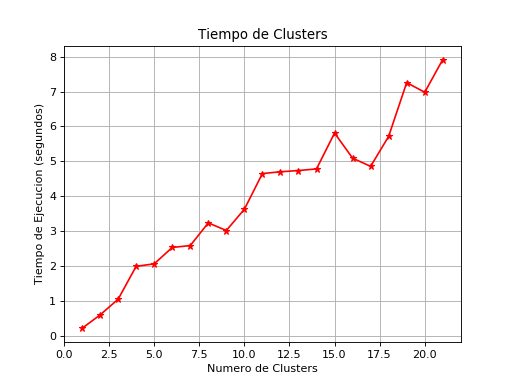

Text(0.5, 1.0, 'Tiempo de Clusters')

In [89]:
fig2=plt.figure()
plt.plot(K_range, timeTotal, 'b*-', color="red")
plt.grid(True)
plt.xlabel('Numero de Clusters')
plt.ylabel('Tiempo de Ejecucion (segundos)')
plt.title('Tiempo de Clusters')

# Agrupacion en los Kluester escogidos

In [90]:
def doKmeans(x, nclust=8, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full'):
    model = KMeans(nclust)
    model.fit(x)
    clust_labels = model.predict(x)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(principalDfA, 40, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full')
kmeans = pd.DataFrame(clust_labels,columns=['Grupos'])

In [91]:
kmeans
UserGrupoK=kmeans.groupby(kmeans.Grupos).Grupos.count()

UserGrupoK=UserGrupoK.sort_values(ascending=False, inplace=False, kind='quicksort')

<IPython.core.display.Javascript object>


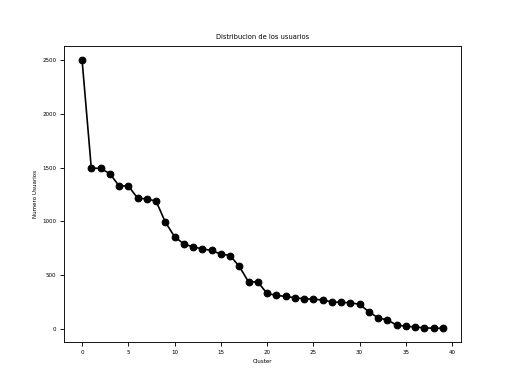

In [92]:
import matplotlib.pyplot as plt

grupo=UserGrupoK.index.tolist()
valores=UserGrupoK.values.tolist()

plt.rcParams.update({'font.size': 5})
plt.plot(range(len(grupo)), valores, color='black', marker='o')
plt.title("Distribucion de los usuarios")
plt.xlabel("Cluster")
plt.ylabel("Numero Usuarios")
plt.show()

# Visualizacion

In [93]:
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

num_components=3
pca = PCA(num_components)
principalComponents = pca.fit_transform(X)

num_components=principalComponents.shape[1]
explained_variance_ratio_=pca.explained_variance_ratio_
explained_variance_ratio_
a = range(num_components)
num_pc= a[::1]

principalDfA = pd.DataFrame(data = principalComponents, columns = num_pc)
principalDfA=round(principalDfA, 2)

clust_labels, cent = doKmeans(principalDfA, 8)
kmeans = pd.DataFrame(clust_labels)
finalDfA = pd.concat([principalDfA, kmeans], axis = 1)
finalDfA.columns = ['ComponentePrincipal1', 'ComponentePrincipal2', 'ComponentePrincipal3', 'target']

<IPython.core.display.Javascript object>


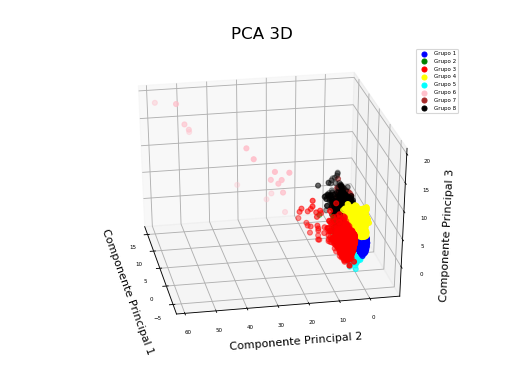

In [94]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

def init():
    ax1.set_xlabel('Componente Principal 1', fontsize=10)
    ax1.set_ylabel('Componente Principal 2', fontsize=10)
    ax1.set_zlabel('Componente Principal 3', fontsize=10)
    ax1.set_title('PCA 3D',fontsize=15)
    targets=[0,1,2,3,4,5,6,7]
    targetsNom=['Grupo 1', 'Grupo 2','Grupo 3', 'Grupo 4','Grupo 5', 'Grupo 6','Grupo 7', 'Grupo 8']
    colors=['blue','green','red', 'yellow','cyan','pink','brown','black']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDfA['target'] == target
        ax1.scatter(finalDfA.loc[indicesToKeep, 'ComponentePrincipal1']
                   , finalDfA.loc[indicesToKeep, 'ComponentePrincipal2']
                   , finalDfA.loc[indicesToKeep, 'ComponentePrincipal3']
                   , c=color
                   )
    ax1.legend(targetsNom)
    ax1.grid()
    return fig,

def animate(i):
    ax1.view_init(elev=30., azim=3.6*i)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)  

<IPython.core.display.Javascript object>


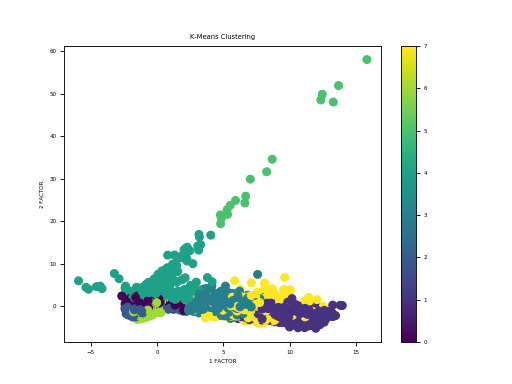

In [95]:
clust_labels, cent = doKmeans(principalDfA, 8)
kmeans = pd.DataFrame(clust_labels)
kmeans
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDfA[0],principalDfA[1],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1 FACTOR')
ax.set_ylabel('2 FACTOR')
plt.colorbar(scatter)

----------------

# Dataset Juventud

In [96]:
from sklearn.decomposition import PCA
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
datasetJuventud.drop('covid19_positivo',1)
XJ=datasetJuventud 
n_samples = XJ.shape[0]
n_features = XJ.shape[1]

#Primera forma: para obtener el porcentaje de varianza obtenido con cada componente
print('********** Primera Forma')

num_components = min(n_samples, n_features)
#num_components=num_componentsSeleccionados

#Se mantiene el 90% de la varianza de los datos
pca = PCA(n_components=.85)
X_transformed = pca.fit_transform(XJ)#Esta es la matriz de componentes principales
eigenvalues = pca.explained_variance_
num_componentsSeleccionados = X_transformed.shape[1]

print(num_componentsSeleccionados)

print('Varianzas:')
print(eigenvalues.round(3))

explained_variance_ratio_=pca.explained_variance_ratio_
print('Porcentaje de varianza de cada dimension con respecto a la varianza total:')
print(explained_variance_ratio_.round(3))

#Se obtiene el porcentaje acumulado de varianza
print('Porcentaje acumulado de varianza:')
explained_variance_ratio_cumsum=explained_variance_ratio_.cumsum()
print(explained_variance_ratio_cumsum.round(3))

********** Primera Forma
22
Varianzas:
[7.038 2.692 2.238 1.852 1.723 1.521 1.357 1.323 1.19  1.18  1.069 1.004
 0.987 0.978 0.921 0.888 0.828 0.774 0.701 0.688 0.628 0.602]
Porcentaje de varianza de cada dimension con respecto a la varianza total:
[0.189 0.072 0.06  0.05  0.046 0.041 0.036 0.035 0.032 0.032 0.029 0.027
 0.026 0.026 0.025 0.024 0.022 0.021 0.019 0.018 0.017 0.016]
Porcentaje acumulado de varianza:
[0.189 0.261 0.321 0.37  0.416 0.457 0.494 0.529 0.561 0.593 0.621 0.648
 0.675 0.701 0.725 0.749 0.771 0.792 0.811 0.829 0.846 0.862]


El Numero de componentes seleccionados es:  22


<IPython.core.display.Javascript object>


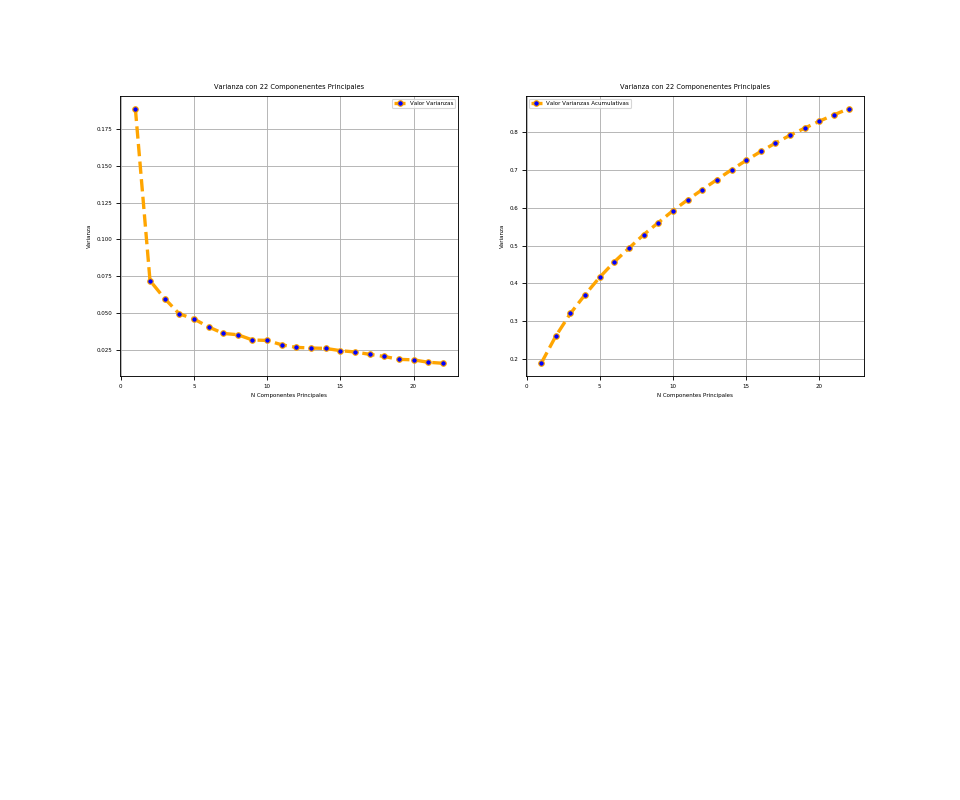

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
count,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,...,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05,1.909380e+05
mean,-1.175381e-16,1.246063e-16,-2.745549e-16,9.973156e-17,-2.498697e-17,-1.043867e-16,6.554478e-19,3.894136e-17,-4.686430e-17,2.158777e-17,...,2.575820e-17,-9.839988e-17,2.864550e-17,3.831804e-18,-4.880927e-17,5.957263e-17,-8.705754e-17,-8.278441e-17,-1.223758e-16,-9.668763e-17
std,2.652922e+00,1.640757e+00,1.495895e+00,1.360838e+00,1.312603e+00,1.233413e+00,1.165019e+00,1.150302e+00,1.091066e+00,1.086364e+00,...,9.936934e-01,9.891076e-01,9.596946e-01,9.424084e-01,9.099084e-01,8.798550e-01,8.374598e-01,8.296314e-01,7.923830e-01,7.759937e-01
min,-7.118207e+00,-4.485384e+00,-8.325400e+00,-3.981596e+00,-7.004791e+00,-6.541687e+00,-4.976468e+00,-6.863688e+00,-7.337751e+00,-5.458690e+00,...,-1.538820e+01,-8.627240e+00,-3.927784e+00,-1.376811e+00,-1.709941e+01,-1.929949e+01,-6.997812e+00,-5.419739e+00,-7.520634e+00,-4.558753e+00
25%,-1.130098e+00,-9.275064e-01,-9.031744e-01,-9.555508e-01,-8.575226e-01,-7.447771e-01,-5.768296e-01,-7.289066e-01,-3.882810e-01,-7.296614e-01,...,-2.003263e-01,-5.974592e-01,-6.372576e-01,-1.510161e-01,-3.739416e-01,-3.634975e-01,-4.651497e-01,-5.731062e-01,-4.211078e-01,-4.740249e-01
50%,-8.641499e-01,-5.032552e-01,-7.815959e-02,-1.948991e-01,3.264957e-02,9.491526e-02,1.321408e-01,-2.985063e-02,-1.889616e-02,-3.595992e-02,...,2.693910e-02,-6.797563e-03,-4.027570e-02,3.888655e-03,9.959122e-02,-5.670931e-02,4.278938e-02,-4.731976e-02,-1.127921e-01,-4.463255e-02
75%,-4.572082e-01,6.115832e-01,7.127919e-01,7.409016e-01,8.628618e-01,8.307058e-01,7.001807e-01,7.458787e-01,3.169294e-01,6.830735e-01,...,3.093435e-01,6.810293e-01,5.846621e-01,1.443907e-01,4.260147e-01,3.607585e-01,5.078565e-01,5.504115e-01,2.866909e-01,4.432707e-01
max,1.884843e+01,6.110511e+01,1.246183e+01,1.411135e+01,1.305376e+01,1.107156e+01,3.654901e+01,1.042687e+01,2.971302e+01,1.325477e+01,...,1.863695e+01,9.315013e+00,1.869651e+01,7.016434e+01,2.653560e+01,2.660863e+01,8.043118e+00,6.223458e+00,7.603148e+00,4.938259e+00


In [97]:
print("El Numero de componentes seleccionados es: ", num_componentsSeleccionados)
num_pc= num_componentsSeleccionados

a = range(1,num_pc+1)
num_pc= a[::1]


plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)

plt.plot(num_pc, explained_variance_ratio_, color='orange', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'Valor Varianzas')
plt.title('Varianza con '+str(num_componentsSeleccionados)+' Componenentes Principales')
plt.xlabel('N Componentes Principales')
plt.ylabel('Varianza')
plt.legend(loc="upper right")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(num_pc, explained_variance_ratio_cumsum, color='orange', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'Valor Varianzas Acumulativas')
plt.title('Varianza con '+str(num_componentsSeleccionados)+' Componenentes Principales')
plt.xlabel('N Componentes Principales')
plt.ylabel('Varianza')
plt.legend(loc="upper left")
plt.grid()
plt.show()

principalDfJ = pd.DataFrame(data = X_transformed
             , columns = num_pc)
principalDfJ.describe()

# Accuracy del dataset Juventud con reduccion de Dimensionalidad

In [98]:
principalDfJ['Salida']=datasetJuventud['covid19_positivo'].values

In [99]:
XSJ = principalDfJ.drop('Salida',1)
ySJ = principalDfJ['Salida']

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XSJ, ySJ, test_size=0.2, random_state=0) 

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [102]:
from sklearn.decomposition import PCA

pca = PCA()  
PCAX_train = pca.fit_transform(X_train)  
PCAX_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_

In [103]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(PCAX_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(PCAX_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [104]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[38110     0]
 [   78     0]]
accuracy: 0.9979574735519011


-------------------

# Encontrar el Numero de componentes con Accuracy del Dataset reducido Juventud

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

PDAaccuracy= []
PDAncomponents=[]
for i in range(1,22):
    pca = PCA(n_components=i);
    PCAX_train = pca.fit_transform(X_train);
    PCAX_test = pca.transform(X_test);
    explained_variance = pca.explained_variance_ratio_;
    classifier = RandomForestClassifier(max_depth=2, random_state=0);
    classifier.fit(PCAX_train, y_train);
    y_pred = classifier.predict(PCAX_test);
    PDAncomponents.append(i);
    cm = confusion_matrix(y_test, y_pred);
    PDAaccuracy.append(accuracy_score(y_test, y_pred));

In [106]:
AccuracyMaximo = max(PDAaccuracy, key=float);
numComponente = PDAaccuracy.index(AccuracyMaximo);
print("Num. Componentes = ", numComponente+1, "AcuraccyMaximo = ", AccuracyMaximo)

Num. Componentes =  1 AcuraccyMaximo =  0.9979574735519011


--------------

# Encontrar el Mejor K con el Metodo de Elbow

<IPython.core.display.Javascript object>


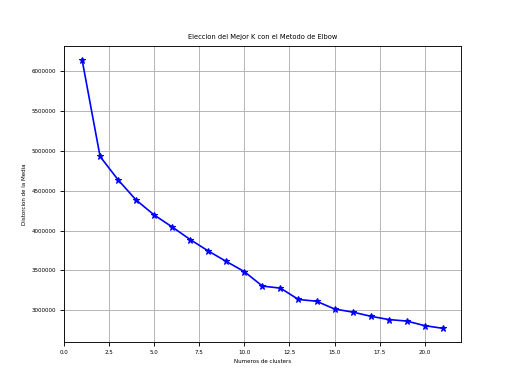

Text(0.5, 1.0, 'Eleccion del Mejor K con el Metodo de Elbow')

In [107]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from time import time
X=principalDfJ
K_range=range(1,22,1)
distortions=[]
timeTotal=[]

for i in K_range:
    timeI=time()
    kmeanModel = KMeans(n_clusters=i,init='k-means++')
    kmeanModel.fit(principalDfJ)
    distortions.append(kmeanModel.inertia_)
    timeF=time()
    timeC= timeF - timeI
    timeTotal.append(timeC)
        
fig1=plt.figure()
ex = fig1.add_subplot(111)
ex.plot(K_range, distortions, 'b*-')

plt.grid(True)
plt.xlabel('Numeros de clusters')
plt.ylabel('Distorcion de la Media')
plt.title('Eleccion del Mejor K con el Metodo de Elbow')

# Tiempo de Ejecucion con cada numero de Klusters

<IPython.core.display.Javascript object>


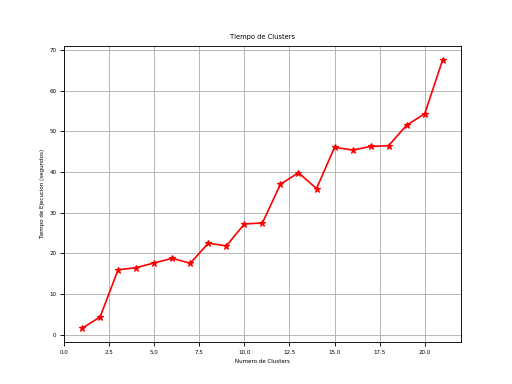

Text(0.5, 1.0, 'Tiempo de Clusters')

In [108]:
fig2=plt.figure()
plt.plot(K_range, timeTotal, 'b*-', color="red")
plt.grid(True)
plt.xlabel('Numero de Clusters')
plt.ylabel('Tiempo de Ejecucion (segundos)')
plt.title('Tiempo de Clusters')

# Agrupacion en los Kluester escogidos

In [109]:
def doKmeans(x, nclust=12, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full'):
    model = KMeans(nclust)
    model.fit(x)
    clust_labels = model.predict(x)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(principalDfJ, 40, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full')
kmeans = pd.DataFrame(clust_labels,columns=['Grupos'])

In [110]:
kmeans
UserGrupoK=kmeans.groupby(kmeans.Grupos).Grupos.count()

UserGrupoK=UserGrupoK.sort_values(ascending=False, inplace=False, kind='quicksort')

<IPython.core.display.Javascript object>


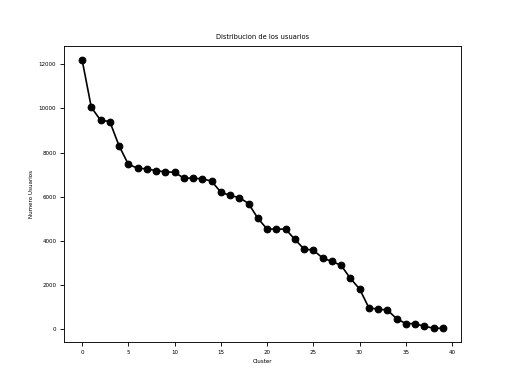

In [111]:
import matplotlib.pyplot as plt

grupo=UserGrupoK.index.tolist()
valores=UserGrupoK.values.tolist()

plt.rcParams.update({'font.size': 5})
plt.plot(range(len(grupo)), valores, color='black', marker='o')
plt.title("Distribucion de los usuarios")
plt.xlabel("Cluster")
plt.ylabel("Numero Usuarios")
plt.show()

# Visualizacion

In [112]:
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

num_components=3
pca = PCA(num_components)
principalComponents = pca.fit_transform(X)

num_components=principalComponents.shape[1]
explained_variance_ratio_=pca.explained_variance_ratio_
explained_variance_ratio_
a = range(num_components)
num_pc= a[::1]

principalDfJ = pd.DataFrame(data = principalComponents, columns = num_pc)
principalDfJ=round(principalDfJ, 2)

clust_labels, cent = doKmeans(principalDfJ, 12)
kmeans = pd.DataFrame(clust_labels)
finalDfJ = pd.concat([principalDfJ, kmeans], axis = 1)
finalDfJ.columns = ['ComponentePrincipal1', 'ComponentePrincipal2', 'ComponentePrincipal3', 'target']

<IPython.core.display.Javascript object>


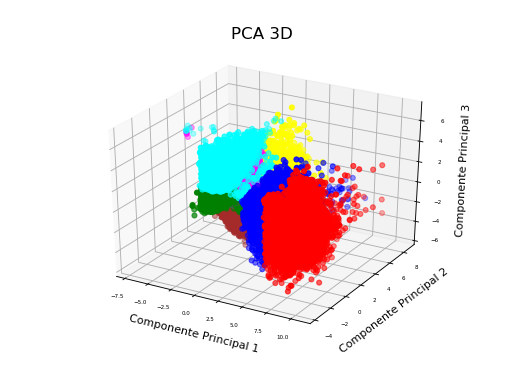

In [114]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

def init():
    ax1.set_xlabel('Componente Principal 1', fontsize=10)
    ax1.set_ylabel('Componente Principal 2', fontsize=10)
    ax1.set_zlabel('Componente Principal 3', fontsize=10)
    ax1.set_title('PCA 3D',fontsize=15)
    targets=[0,1,2,3,4,5,6,7,8,9,10,11]
    targetsNom=['Grupo 1', 'Grupo 2','Grupo 3', 'Grupo 4','Grupo 5', 'Grupo 6','Grupo 7', 'Grupo 8', 'Grupo 9','Grupo 10', 'Grupo 11','Grupo 12']
    colors=['blue','green','red', 'yellow',"cyan","brown","magenta","prink",'black', "orange","gray","fuchsia"]
    for target, color in zip(targets,colors):
        indicesToKeep = finalDfJ['target'] == target
        ax1.scatter(finalDfJ.loc[indicesToKeep, 'ComponentePrincipal1']
                   , finalDfJ.loc[indicesToKeep, 'ComponentePrincipal2']
                   , finalDfJ.loc[indicesToKeep, 'ComponentePrincipal3']
                   , c=color
                   )
    ax1.legend(targetsNom)
    ax1.grid()
    return fig,

def animate(i):
    ax1.view_init(elev=30., azim=3.6*i)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)  

<IPython.core.display.Javascript object>


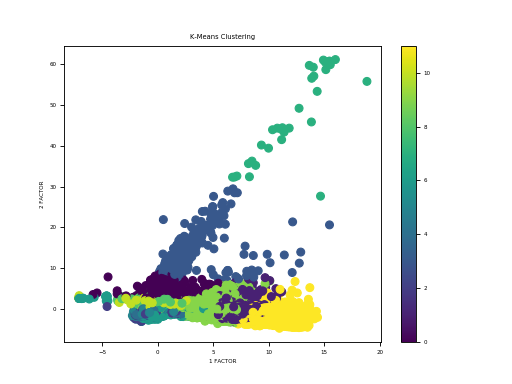

In [115]:
clust_labels, cent = doKmeans(principalDfJ, 12)
kmeans = pd.DataFrame(clust_labels)
kmeans
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDfJ[0],principalDfJ[1],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1 FACTOR')
ax.set_ylabel('2 FACTOR')
plt.colorbar(scatter)

--------------------------

# Dataset Adultez

In [116]:
from sklearn.decomposition import PCA
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
datasetAdultez.drop('covid19_positivo',1)
XAZ=datasetAdultez 
n_samples = XAZ.shape[0]
n_features = XAZ.shape[1]

#Primera forma: para obtener el porcentaje de varianza obtenido con cada componente
print('********** Primera Forma')

num_components = min(n_samples, n_features)
#num_components=num_componentsSeleccionados

#Se mantiene el 90% de la varianza de los datos
pca = PCA(n_components=.85)
X_transformed = pca.fit_transform(XAZ)#Esta es la matriz de componentes principales
eigenvalues = pca.explained_variance_
num_componentsSeleccionados = X_transformed.shape[1]

print(num_componentsSeleccionados)

print('Varianzas:')
print(eigenvalues.round(3))

explained_variance_ratio_=pca.explained_variance_ratio_
print('Porcentaje de varianza de cada dimension con respecto a la varianza total:')
print(explained_variance_ratio_.round(3))

#Se obtiene el porcentaje acumulado de varianza
print('Porcentaje acumulado de varianza:')
explained_variance_ratio_cumsum=explained_variance_ratio_.cumsum()
print(explained_variance_ratio_cumsum.round(3))

********** Primera Forma
22
Varianzas:
[9.895 2.164 1.925 1.794 1.659 1.535 1.251 1.232 1.071 1.031 0.984 0.963
 0.905 0.904 0.885 0.834 0.767 0.759 0.711 0.687 0.678 0.609]
Porcentaje de varianza de cada dimension con respecto a la varianza total:
[0.255 0.056 0.05  0.046 0.043 0.04  0.032 0.032 0.028 0.027 0.025 0.025
 0.023 0.023 0.023 0.022 0.02  0.02  0.018 0.018 0.017 0.016]
Porcentaje acumulado de varianza:
[0.255 0.311 0.361 0.407 0.45  0.489 0.522 0.553 0.581 0.608 0.633 0.658
 0.681 0.704 0.727 0.749 0.769 0.788 0.807 0.824 0.842 0.857]


El Numero de componentes seleccionados es:  22


<IPython.core.display.Javascript object>


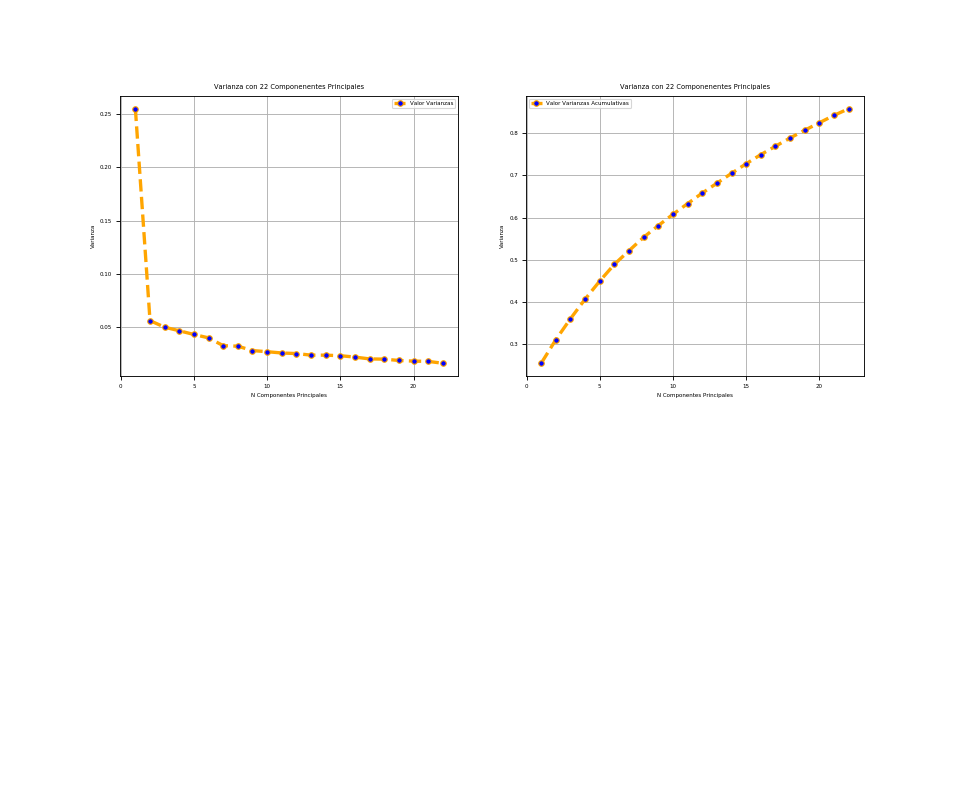

,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,22
count,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,...,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05,5.251420e+05
mean,-2.571943e-16,2.459744e-16,-9.320688e-17,7.395342e-17,6.070749e-17,3.429519e-17,4.673515e-18,3.613317e-17,1.209689e-16,4.176439e-17,...,-4.881388e-17,1.284889e-16,8.531617e-17,3.054106e-17,-1.104303e-16,1.477698e-17,-6.233327e-17,-1.207384e-16,-3.997411e-17,8.131675e-17
std,3.145599e+00,1.471027e+00,1.387333e+00,1.339516e+00,1.288010e+00,1.239011e+00,1.118483e+00,1.109844e+00,1.035035e+00,1.015400e+00,...,9.514362e-01,9.510052e-01,9.405575e-01,9.133092e-01,8.760465e-01,8.714247e-01,8.430174e-01,8.287513e-01,8.234808e-01,7.801312e-01
min,-7.090585e+00,-6.250023e+00,-5.331162e+00,-3.988302e+00,-6.008325e+00,-5.387607e+00,-6.336659e+00,-5.089516e+00,-5.789864e+00,-5.703488e+00,...,-8.210244e+00,-1.278438e+01,-8.877761e+00,-1.521114e+01,-5.842641e+00,-8.458976e+00,-5.084393e+00,-2.103679e+00,-6.042380e+00,-8.460244e+00
25%,-1.511508e+00,-7.659569e-01,-8.117407e-01,-9.330866e-01,-8.280371e-01,-8.196450e-01,-7.071635e-01,-7.168806e-01,-6.219020e-01,-6.495778e-01,...,-6.194601e-01,-3.701288e-01,-5.696683e-01,-3.799814e-01,-2.563076e-01,-4.177923e-01,-4.984048e-01,-2.085426e-01,-4.562673e-01,-2.267839e-01
50%,-1.298725e+00,1.634663e-02,-2.244471e-01,-1.875380e-01,8.962771e-02,-6.427320e-02,-1.080915e-02,2.501761e-02,6.797699e-02,2.942629e-02,...,-1.300176e-02,4.587863e-02,1.268671e-02,-5.875414e-02,5.026717e-02,-1.513031e-02,1.441471e-02,1.160852e-02,-4.372306e-02,4.111595e-02
75%,-8.819207e-01,8.631571e-01,5.987330e-01,6.997449e-01,9.321556e-01,7.447690e-01,6.932712e-01,7.139255e-01,6.837178e-01,6.886405e-01,...,5.985581e-01,4.325868e-01,5.912436e-01,2.846100e-01,3.291511e-01,3.856356e-01,4.546779e-01,2.195276e-01,3.828503e-01,2.596356e-01
max,1.600343e+01,8.992266e+00,5.583823e+01,1.468057e+01,1.302681e+01,1.657206e+01,1.960796e+01,1.644091e+01,2.692167e+01,1.228595e+01,...,9.175063e+00,2.112478e+01,1.397542e+01,2.896656e+01,2.184548e+01,8.465807e+00,8.815317e+00,6.543161e+01,3.191564e+01,9.317806e+00


In [117]:
print("El Numero de componentes seleccionados es: ", num_componentsSeleccionados)
num_pc= num_componentsSeleccionados

a = range(1,num_pc+1)
num_pc= a[::1]


plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)

plt.plot(num_pc, explained_variance_ratio_, color='orange', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'Valor Varianzas')
plt.title('Varianza con '+str(num_componentsSeleccionados)+' Componenentes Principales')
plt.xlabel('N Componentes Principales')
plt.ylabel('Varianza')
plt.legend(loc="upper right")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(num_pc, explained_variance_ratio_cumsum, color='orange', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'Valor Varianzas Acumulativas')
plt.title('Varianza con '+str(num_componentsSeleccionados)+' Componenentes Principales')
plt.xlabel('N Componentes Principales')
plt.ylabel('Varianza')
plt.legend(loc="upper left")
plt.grid()
plt.show()

principalDfAZ = pd.DataFrame(data = X_transformed
             , columns = num_pc)
principalDfAZ.describe()

# Accuracy del dataset Adultez con reduccion de Dimensionalidad

In [118]:
principalDfAZ['Salida']=datasetAdultez['covid19_positivo'].values

In [119]:
XAZ = principalDfAZ.drop('Salida',1)
yAZ = principalDfAZ['Salida']

In [120]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XAZ, yAZ, test_size=0.2, random_state=0) 

In [121]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [122]:
from sklearn.decomposition import PCA

pca = PCA()  
PCAX_train = pca.fit_transform(X_train)  
PCAX_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_ 

In [123]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(PCAX_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(PCAX_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred))) 

[[104785      0]
 [   244      0]]
accuracy: 0.9976768321130355


-------------------

# Encontrar el Numero de componentes con Accuracy del Dataset reducido Adultez

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

PDAaccuracy= []
PDAncomponents=[]
for i in range(1,22):
    pca = PCA(n_components=i);
    PCAX_train = pca.fit_transform(X_train);
    PCAX_test = pca.transform(X_test);
    explained_variance = pca.explained_variance_ratio_;
    classifier = RandomForestClassifier(max_depth=2, random_state=0);
    classifier.fit(PCAX_train, y_train);
    y_pred = classifier.predict(PCAX_test);
    PDAncomponents.append(i);
    cm = confusion_matrix(y_test, y_pred);
    PDAaccuracy.append(accuracy_score(y_test, y_pred));

In [126]:
AccuracyMaximo = max(PDAaccuracy, key=float);
numComponente = PDAaccuracy.index(AccuracyMaximo);
print("Num. Componentes = ", numComponente+1, "AcuraccyMaximo = ", AccuracyMaximo)

Num. Componentes =  1 AcuraccyMaximo =  0.9976768321130355


--------------

# Encontrar el Mejor K con el Metodo de Elbow

<IPython.core.display.Javascript object>


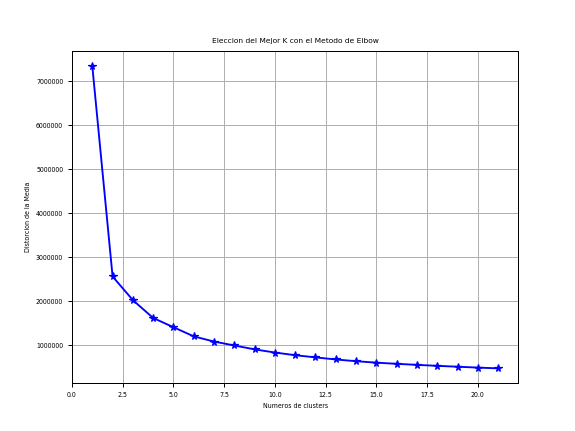

Text(0.5, 1.0, 'Eleccion del Mejor K con el Metodo de Elbow')

In [159]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from time import time
X=principalDfAZ
K_range=range(1,22,1)
distortions=[]
timeTotal=[]

for i in K_range:
    timeI=time()
    kmeanModel = KMeans(n_clusters=i,init='k-means++')
    kmeanModel.fit(principalDfAZ)
    distortions.append(kmeanModel.inertia_)
    timeF=time()
    timeC= timeF - timeI
    timeTotal.append(timeC)
        
fig1=plt.figure()
ex = fig1.add_subplot(111)
ex.plot(K_range, distortions, 'b*-')

plt.grid(True)
plt.xlabel('Numeros de clusters')
plt.ylabel('Distorcion de la Media')
plt.title('Eleccion del Mejor K con el Metodo de Elbow')

# Tiempo de Ejecucion con cada numero de Klusters

<IPython.core.display.Javascript object>


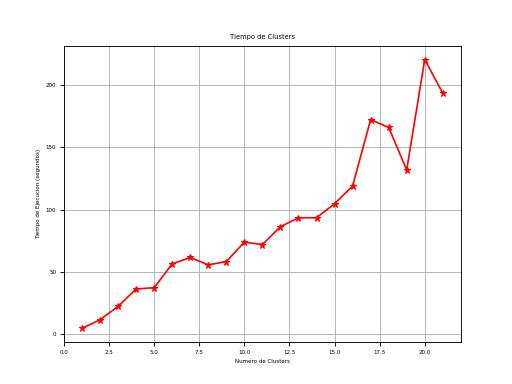

Text(0.5, 1.0, 'Tiempo de Clusters')

In [128]:
fig2=plt.figure()
plt.plot(K_range, timeTotal, 'b*-', color="red")
plt.grid(True)
plt.xlabel('Numero de Clusters')
plt.ylabel('Tiempo de Ejecucion (segundos)')
plt.title('Tiempo de Clusters')

# Agrupacion en los Kluester escogidos

In [133]:
def doKmeans(x, nclust=2, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full'):
    model = KMeans(nclust)
    model.fit(x)
    clust_labels = model.predict(x)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(principalDfAZ, 40, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full')
kmeans = pd.DataFrame(clust_labels,columns=['Grupos'])

In [134]:
kmeans
UserGrupoK=kmeans.groupby(kmeans.Grupos).Grupos.count()

UserGrupoK=UserGrupoK.sort_values(ascending=False, inplace=False, kind='quicksort')

<IPython.core.display.Javascript object>


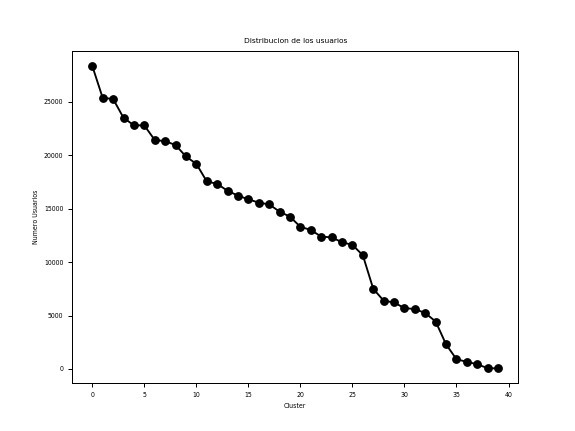

In [135]:
import matplotlib.pyplot as plt

grupo=UserGrupoK.index.tolist()
valores=UserGrupoK.values.tolist()

plt.rcParams.update({'font.size': 5})
plt.plot(range(len(grupo)), valores, color='black', marker='o')
plt.title("Distribucion de los usuarios")
plt.xlabel("Cluster")
plt.ylabel("Numero Usuarios")
plt.show()

# Visualizacion

In [136]:
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

num_components=3
pca = PCA(num_components)
principalComponents = pca.fit_transform(X)

num_components=principalComponents.shape[1]
explained_variance_ratio_=pca.explained_variance_ratio_
explained_variance_ratio_
a = range(num_components)
num_pc= a[::1]

principalDfAZ = pd.DataFrame(data = principalComponents, columns = num_pc)
principalDfAZ=round(principalDfAZ, 2)

clust_labels, cent = doKmeans(principalDfAZ, 10)
kmeans = pd.DataFrame(clust_labels)
finalDfAZ = pd.concat([principalDfAZ, kmeans], axis = 1)
finalDfAZ.columns = ['ComponentePrincipal1', 'ComponentePrincipal2', 'ComponentePrincipal3', 'target']

<IPython.core.display.Javascript object>


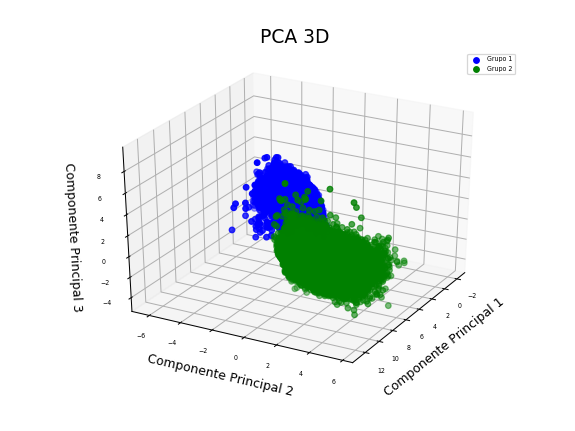

In [137]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

def init():
    ax1.set_xlabel('Componente Principal 1', fontsize=10)
    ax1.set_ylabel('Componente Principal 2', fontsize=10)
    ax1.set_zlabel('Componente Principal 3', fontsize=10)
    ax1.set_title('PCA 3D',fontsize=15)
    targets=[0,1]
    targetsNom=['Grupo 1', 'Grupo 2']
    colors=['blue','green']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDfAZ['target'] == target
        ax1.scatter(finalDfAZ.loc[indicesToKeep, 'ComponentePrincipal1']
                   , finalDfAZ.loc[indicesToKeep, 'ComponentePrincipal2']
                   , finalDfAZ.loc[indicesToKeep, 'ComponentePrincipal3']
                   , c=color
                   )
    ax1.legend(targetsNom)
    ax1.grid()
    return fig,

def animate(i):
    ax1.view_init(elev=30., azim=3.6*i)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)  

<IPython.core.display.Javascript object>


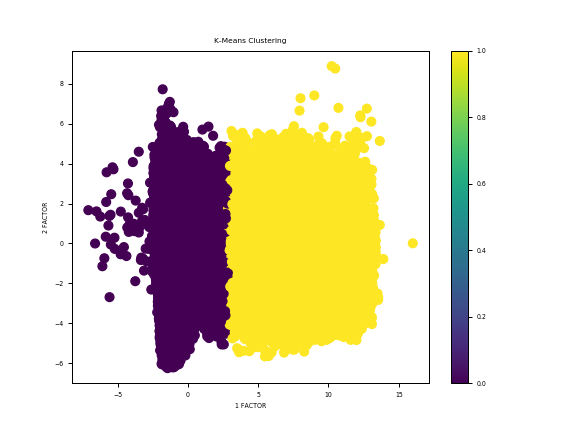

In [138]:
clust_labels, cent = doKmeans(principalDfAZ, 2)
kmeans = pd.DataFrame(clust_labels)
kmeans
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDfAZ[0],principalDfAZ[1],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1 FACTOR')
ax.set_ylabel('2 FACTOR')
plt.colorbar(scatter)

------------

# Dataset Mayores

In [139]:
from sklearn.decomposition import PCA
import numpy as np  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
datasetPMayor.drop('covid19_positivo',1)
XM=datasetPMayor 
n_samples = XM.shape[0]
n_features = XM.shape[1]

#Primera forma: para obtener el porcentaje de varianza obtenido con cada componente
print('********** Primera Forma')

num_components = min(n_samples, n_features)
#num_components=num_componentsSeleccionados

#Se mantiene el 85% de la varianza de los datos
pca = PCA(n_components=.85)
X_transformed = pca.fit_transform(XM)#Esta es la matriz de componentes principales
eigenvalues = pca.explained_variance_
num_componentsSeleccionados = X_transformed.shape[1]

print(num_componentsSeleccionados)

print('Varianzas:')
print(eigenvalues.round(3))

explained_variance_ratio_=pca.explained_variance_ratio_
print('Porcentaje de varianza de cada dimension con respecto a la varianza total:')
print(explained_variance_ratio_.round(3))

#Se obtiene el porcentaje acumulado de varianza
print('Porcentaje acumulado de varianza:')
explained_variance_ratio_cumsum=explained_variance_ratio_.cumsum()
print(explained_variance_ratio_cumsum.round(3))




********** Primera Forma
19
Varianzas:
[13.734 10.733  6.154  3.785  3.415  1.971  1.931  1.787  1.496  1.404
  1.309  1.223  1.174  1.06   1.013  0.992  0.944  0.911  0.873]
Porcentaje de varianza de cada dimension con respecto a la varianza total:
[0.211 0.165 0.095 0.058 0.053 0.03  0.03  0.028 0.023 0.022 0.02  0.019
 0.018 0.016 0.016 0.015 0.015 0.014 0.013]
Porcentaje acumulado de varianza:
[0.211 0.377 0.472 0.53  0.582 0.613 0.643 0.67  0.693 0.715 0.735 0.754
 0.772 0.788 0.804 0.819 0.833 0.848 0.861]


El Numero de componentes seleccionados es:  19


<IPython.core.display.Javascript object>


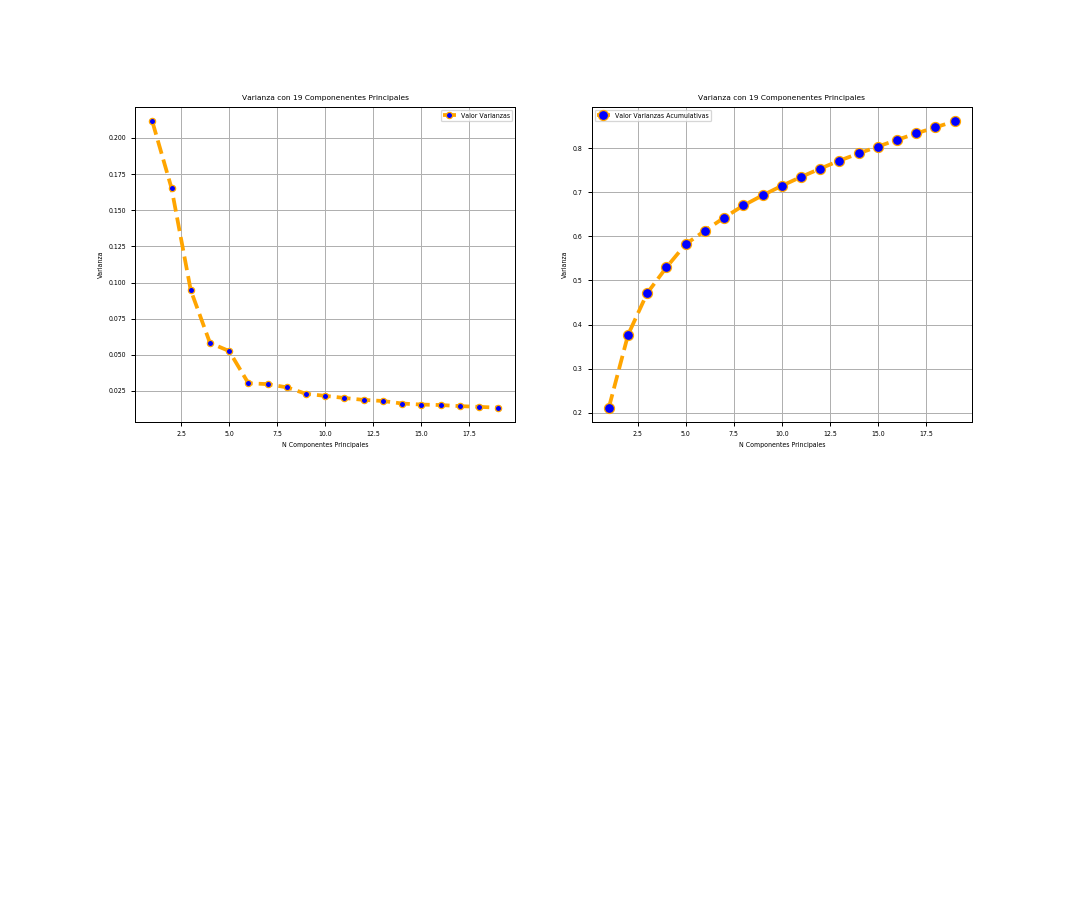

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04,7.478000e+04
mean,-6.652430e-16,-2.497334e-17,3.439257e-16,-9.066475e-17,3.494872e-17,4.515125e-17,1.182971e-16,-7.769408e-17,9.953109e-18,-6.239400e-17,1.033689e-17,1.962859e-17,-1.899019e-17,4.721788e-17,-1.023579e-16,1.497123e-17,5.150259e-17,-1.454959e-18,-2.823066e-17
std,3.705924e+00,3.276199e+00,2.480642e+00,1.945528e+00,1.848068e+00,1.404091e+00,1.389542e+00,1.336733e+00,1.223243e+00,1.184853e+00,1.143983e+00,1.105817e+00,1.083327e+00,1.029360e+00,1.006653e+00,9.961396e-01,9.713967e-01,9.543325e-01,9.343777e-01
min,-6.451935e+00,-3.602969e+00,-2.575641e+01,-1.941228e+01,-2.560119e+00,-1.158045e+01,-4.993868e+00,-1.002446e+01,-4.634646e+00,-9.483898e+00,-1.001955e+01,-7.100177e+00,-8.095364e+00,-5.956107e+00,-6.822085e+00,-5.108998e+00,-6.218387e+00,-4.676588e+00,-5.528459e+00
25%,-2.339887e+00,-1.237133e+00,-6.994080e-01,-5.445292e-01,-8.297937e-02,-7.701969e-01,-6.977136e-01,-9.047278e-01,-6.721394e-01,-8.208590e-01,-4.521359e-01,-3.763856e-01,-6.866697e-01,-6.244691e-01,-6.741126e-01,-6.019562e-01,-6.392280e-01,-5.248656e-01,-5.990820e-01
50%,-2.021979e+00,-9.186268e-01,-3.114788e-01,-6.145573e-02,-3.409902e-02,-9.252610e-02,-2.112854e-01,-2.662450e-01,2.589064e-01,-4.804667e-02,-1.250350e-02,1.099805e-02,-3.706114e-02,-6.120635e-02,-1.860943e-02,4.125089e-02,-7.718703e-02,-1.042612e-02,-2.180968e-02
75%,2.370715e+00,3.085060e-01,5.986821e-01,3.696975e-01,9.562625e-03,7.401903e-01,3.704247e-01,7.515790e-01,8.286455e-01,7.452395e-01,3.869110e-01,4.442653e-01,6.511362e-01,5.954921e-01,6.403555e-01,6.849358e-01,5.294812e-01,4.573807e-01,5.744511e-01
max,2.452431e+01,7.920419e+01,4.876811e+01,7.316766e+01,7.228040e+01,1.301579e+01,1.437212e+01,1.094151e+01,1.016906e+01,1.047519e+01,2.717032e+01,1.338006e+01,8.267764e+00,7.129527e+00,7.048148e+00,6.108703e+00,7.091855e+00,7.695613e+00,6.481819e+00


In [140]:
print("El Numero de componentes seleccionados es: ", num_componentsSeleccionados)
num_pc= num_componentsSeleccionados

a = range(1,num_pc+1)
num_pc= a[::1]


plt.figure(figsize=(12,10))
plt.subplot(2, 2, 1)

plt.plot(num_pc, explained_variance_ratio_, color='orange', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=5, label = 'Valor Varianzas')
plt.title('Varianza con '+str(num_componentsSeleccionados)+' Componenentes Principales')
plt.xlabel('N Componentes Principales')
plt.ylabel('Varianza')
plt.legend(loc="upper right")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(num_pc, explained_variance_ratio_cumsum, color='orange', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8, label = 'Valor Varianzas Acumulativas')
plt.title('Varianza con '+str(num_componentsSeleccionados)+' Componenentes Principales')
plt.xlabel('N Componentes Principales')
plt.ylabel('Varianza')
plt.legend(loc="upper left")
plt.grid()
plt.show()

principalDfM = pd.DataFrame(data = X_transformed
             , columns = num_pc)
principalDfM.describe()

## Agregar Salida al Dataset Reducido Mayores

In [141]:
principalDfM['Salida']=datasetPMayor['covid19_positivo'].values

## Splitting

In [142]:
XM = principalDfM.drop('Salida',1)
yM = principalDfM['Salida']

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(XM, yM, test_size=0.2, random_state=0) 

# Medir Accuraccy del dataset reducido con la Varianza 

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() 

X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

In [145]:
from sklearn.decomposition import PCA

pca = PCA()  
PCAX_train = pca.fit_transform(X_train)  
PCAX_test = pca.transform(X_test) 
explained_variance = pca.explained_variance_ratio_ 

## Clasificacion con el algoritmo de aprendizaje Radom Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)  
classifier.fit(PCAX_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(PCAX_test)  
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [147]:
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)  
print(cm)  
print('accuracy: ' + str(accuracy_score(y_test, y_pred)))  

[[14893     0]
 [   63     0]]
accuracy: 0.9957876437550147


-------------------

# Encontrar el Numero de componentes con Accuracy del Dataset reducido Personas Mayores

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score

PDAaccuracy= []
PDAncomponents=[]
for i in range(1,19):
    pca = PCA(n_components=i);
    PCAX_train = pca.fit_transform(X_train);
    PCAX_test = pca.transform(X_test);
    explained_variance = pca.explained_variance_ratio_;
    classifier = RandomForestClassifier(max_depth=2, random_state=0);
    classifier.fit(PCAX_train, y_train);
    y_pred = classifier.predict(PCAX_test);
    PDAncomponents.append(i);
    cm = confusion_matrix(y_test, y_pred);
    PDAaccuracy.append(accuracy_score(y_test, y_pred));

In [149]:
AccuracyMaximo = max(PDAaccuracy, key=float);
numComponente = PDAaccuracy.index(AccuracyMaximo);
print("Num. Componentes = ", numComponente+1, "AcuraccyMaximo = ", AccuracyMaximo)

Num. Componentes =  1 AcuraccyMaximo =  0.9957876437550147


--------------

# Encontrar el Mejor K con el Metodo de Elbow

<IPython.core.display.Javascript object>


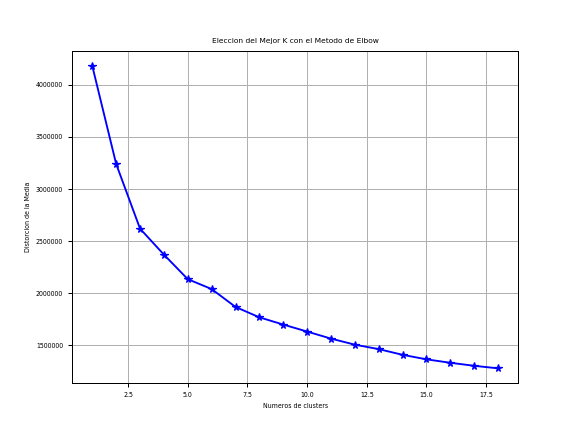

Text(0.5, 1.0, 'Eleccion del Mejor K con el Metodo de Elbow')

In [150]:
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn import metrics
from time import time
X=principalDfM
K_range=range(1,19,1)
distortions=[]
timeTotal=[]

for i in K_range:
    timeI=time()
    kmeanModel = KMeans(n_clusters=i,init='k-means++')
    kmeanModel.fit(principalDfM)
    distortions.append(kmeanModel.inertia_)
    timeF=time()
    timeC= timeF - timeI
    timeTotal.append(timeC)
        
fig1=plt.figure()
ex = fig1.add_subplot(111)
ex.plot(K_range, distortions, 'b*-')

plt.grid(True)
plt.xlabel('Numeros de clusters')
plt.ylabel('Distorcion de la Media')
plt.title('Eleccion del Mejor K con el Metodo de Elbow')

# Tiempo de Ejecucion con cada numero de Klusters

<IPython.core.display.Javascript object>


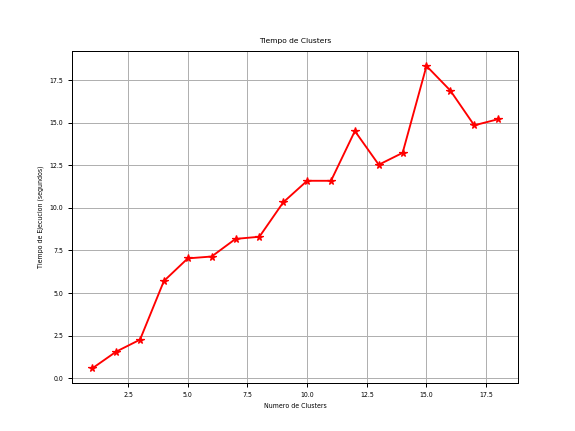

Text(0.5, 1.0, 'Tiempo de Clusters')

In [151]:
fig2=plt.figure()
plt.plot(K_range, timeTotal, 'b*-', color="red")
plt.grid(True)
plt.xlabel('Numero de Clusters')
plt.ylabel('Tiempo de Ejecucion (segundos)')
plt.title('Tiempo de Clusters')

# Agrupacion en los Kluester escogidos

In [152]:
def doKmeans(x, nclust=5, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full'):
    model = KMeans(nclust)
    model.fit(x)
    clust_labels = model.predict(x)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(principalDfM, 40, init='k-means++',max_iter=100, tol=0.0001, random_state=10, algorithm='full')
kmeans = pd.DataFrame(clust_labels,columns=['Grupos'])

In [153]:
kmeans
UserGrupoK=kmeans.groupby(kmeans.Grupos).Grupos.count()

UserGrupoK=UserGrupoK.sort_values(ascending=False, inplace=False, kind='quicksort')

<IPython.core.display.Javascript object>


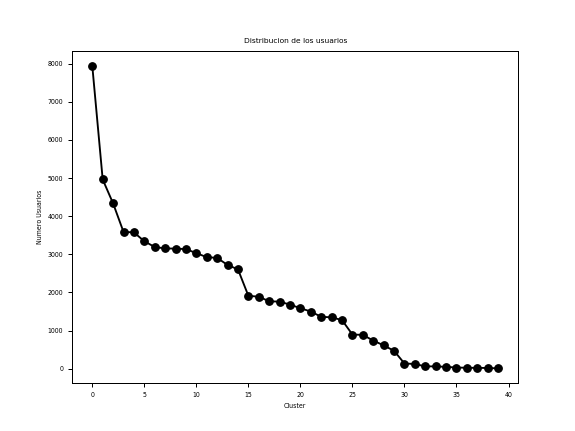

In [155]:
import matplotlib.pyplot as plt

grupo=UserGrupoK.index.tolist()
valores=UserGrupoK.values.tolist()

plt.rcParams.update({'font.size': 5})
plt.plot(range(len(grupo)), valores, color='black', marker='o')
plt.title("Distribucion de los usuarios")
plt.xlabel("Cluster")
plt.ylabel("Numero Usuarios")
plt.show()

# Visualizacion

In [156]:
from mpl_toolkits.mplot3d import axes3d
from sklearn import datasets
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

num_components=3
pca = PCA(num_components)
principalComponents = pca.fit_transform(X)

num_components=principalComponents.shape[1]
explained_variance_ratio_=pca.explained_variance_ratio_
explained_variance_ratio_
a = range(num_components)
num_pc= a[::1]

principalDfM = pd.DataFrame(data = principalComponents, columns = num_pc)
principalDfM=round(principalDfM, 2)

clust_labels, cent = doKmeans(principalDfM, 5)
kmeans = pd.DataFrame(clust_labels)
finalDfM = pd.concat([principalDfM, kmeans], axis = 1)
finalDfM.columns = ['ComponentePrincipal1', 'ComponentePrincipal2', 'ComponentePrincipal3', 'target']

<IPython.core.display.Javascript object>


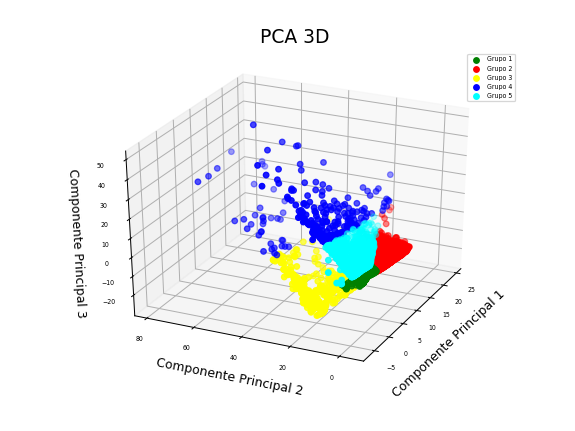

In [157]:
%matplotlib notebook
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.display import HTML
import matplotlib.animation as animation

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

def init():
    ax1.set_xlabel('Componente Principal 1', fontsize=10)
    ax1.set_ylabel('Componente Principal 2', fontsize=10)
    ax1.set_zlabel('Componente Principal 3', fontsize=10)
    ax1.set_title('PCA 3D',fontsize=15)
    targets=[0,1,2,3,4]
    colors=['green','red', 'yellow','blue','cyan','magenta']
    targetsNom=['Grupo 1', 'Grupo 2','Grupo 3', 'Grupo 4','Grupo 5']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDfM['target'] == target
        ax1.scatter(finalDfM.loc[indicesToKeep, 'ComponentePrincipal1']
                   , finalDfM.loc[indicesToKeep, 'ComponentePrincipal2']
                   , finalDfM.loc[indicesToKeep, 'ComponentePrincipal3']
                   , c=color
                   )
    ax1.legend(targetsNom)
    ax1.grid()
    return fig,

def animate(i):
    ax1.view_init(elev=30., azim=3.6*i)
    return fig,

ani = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=100, blit=True)  

<IPython.core.display.Javascript object>


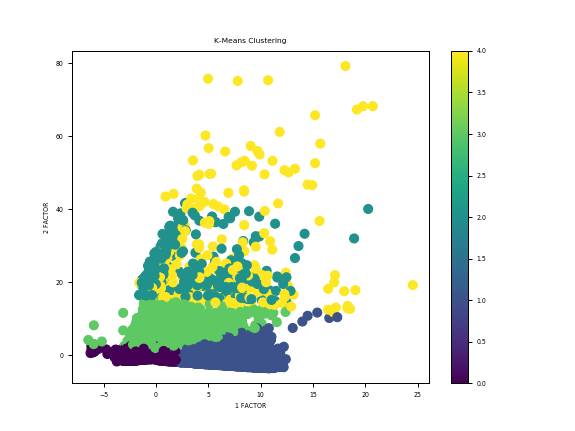

In [158]:
clust_labels, cent = doKmeans(principalDfM, 5)
kmeans = pd.DataFrame(clust_labels)
kmeans
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(principalDfM[0],principalDfM[1],c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('1 FACTOR')
ax.set_ylabel('2 FACTOR')
plt.colorbar(scatter)